In [1]:
import sys
sys.path.insert(0, '../../code-Benchmark/')
from pathlib import Path

import f90nml
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr
from IPython.display import Latex, Markdown, display

import BenchmarkTest_SUEWS as bts




In [2]:
path_site = Path('.').resolve()
site = path_site.name
display(Markdown(f'# Benchmark Report: {site}'))


# Benchmark Report: London_KCL

 ## Evaluation against observations

In [3]:
fn_nml = './BenchmarkTest_SUEWS.nml'
df_bts_input = bts.load_res(fn_nml)
df_metric = bts.benchmark_SUEWS(fn_nml)



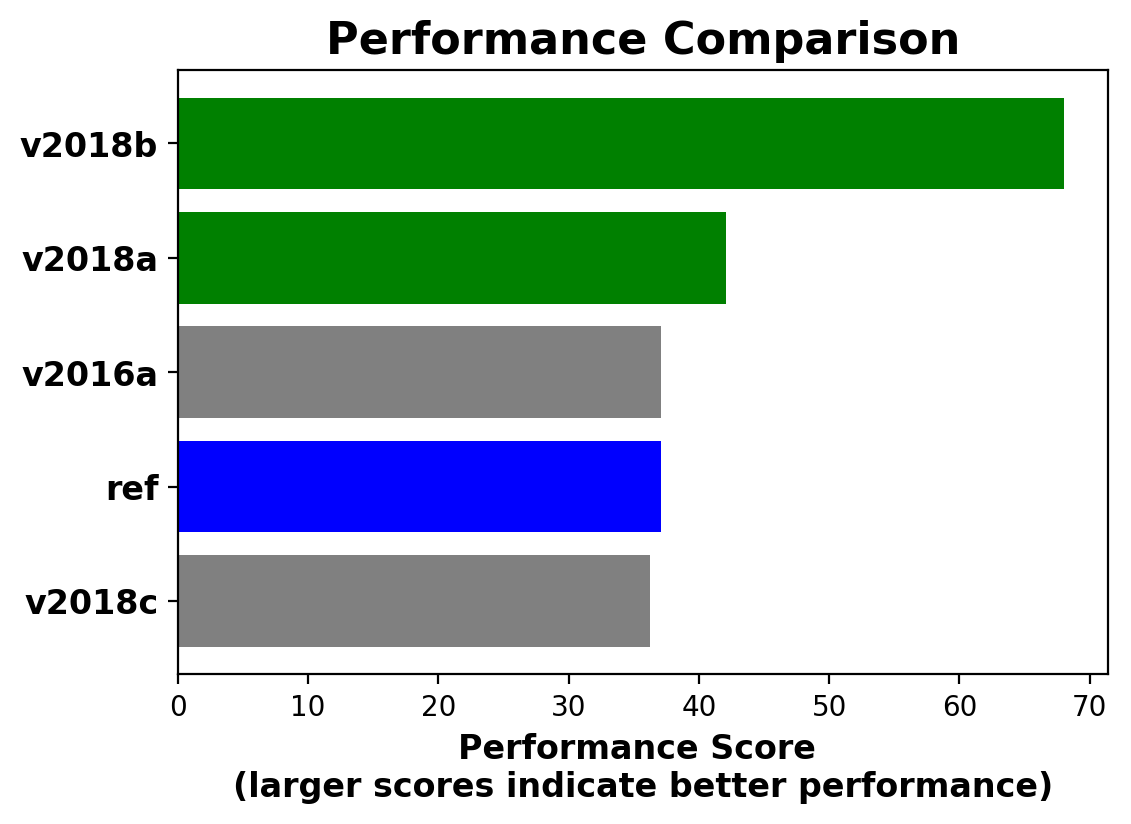

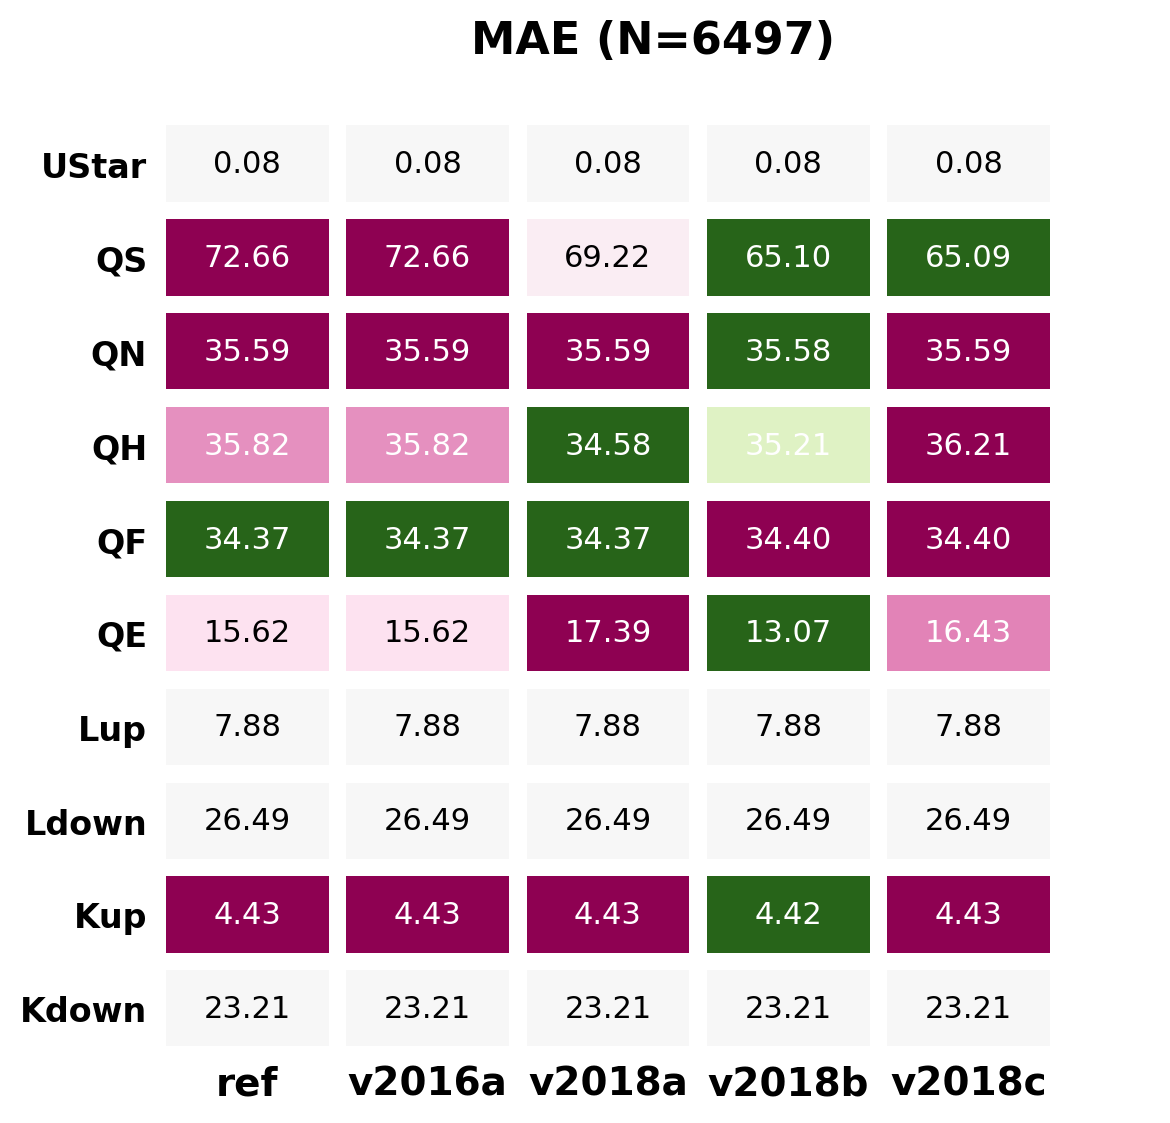

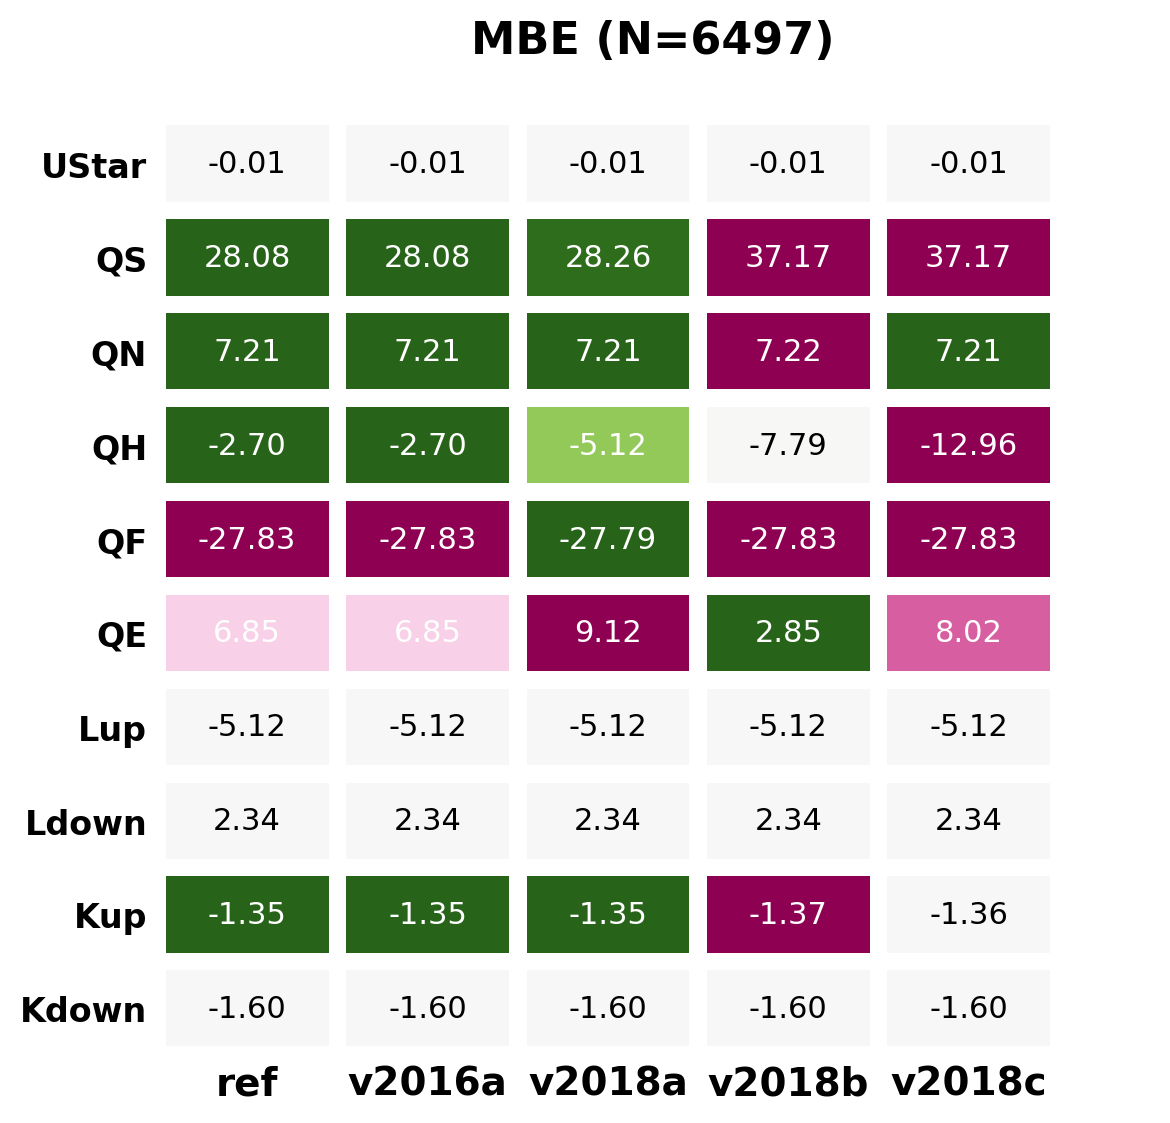

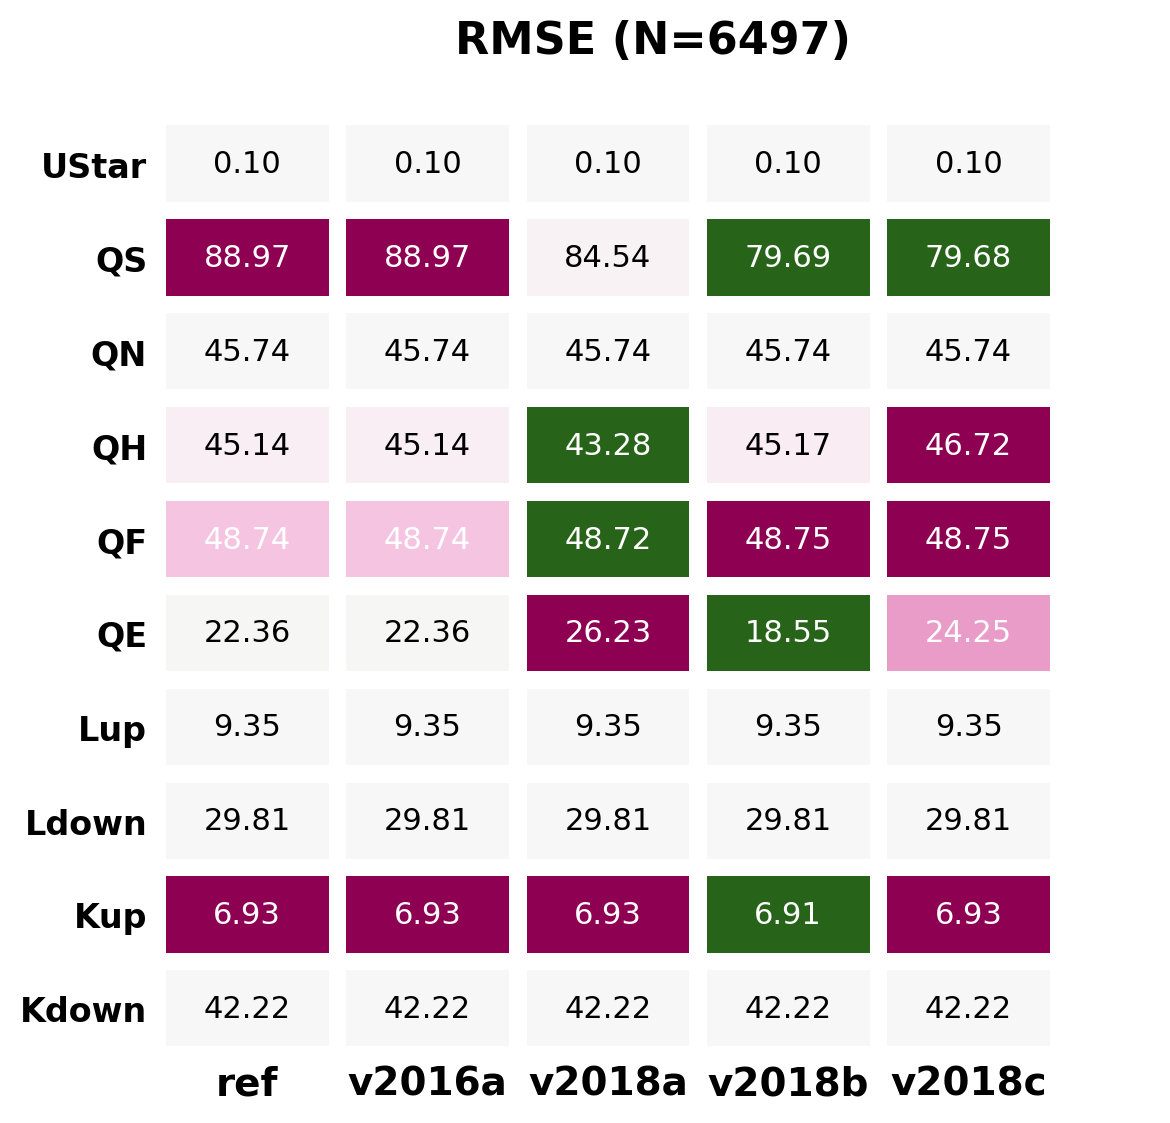

In [4]:
fig_bts=bts.plot_score_metric(df_metric)


 ## Cross-comparison in model variables between releases

 ### Statistics tables

In [5]:
df_bts_mod = bts.load_res_all(fn_nml)\
    .swaplevel(axis=1)\
    .drop(columns=['obs', 'ref'], level=0)\
    .swaplevel(axis=1)\
    .dropna(axis=1, how='all')\
    .dropna(axis=0, how='any')
df_bts_mod.columns = df_bts_mod.columns.remove_unused_levels()



In [6]:
# get common variables
grp_var = df_bts_mod.head().T.swaplevel(
    axis=0).sort_index().index.to_frame().groupby('cfg')
list_var_common = list(set.intersection(
    *grp_var.apply(lambda df: set(df['var'])).values))

df_bts_mod = df_bts_mod[list_var_common]
df_bts_mod.columns = df_bts_mod.columns.remove_unused_levels()



In [7]:
# pd.describe_option('display')
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
df_desc = df_bts_mod.describe().T.unstack().sort_index()
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')



In [8]:
df_desc.loc[:, ['min', 'max', 'mean', 'std']]



mean                                            \
cfg              v2016a        v2018a        v2018b        v2018c   
var                                                                 
AddWater       0.000000      0.000000      0.000000      0.000000   
Drainage       0.054647      0.054460      0.054613      0.054635   
Evap           0.042685      0.045826      0.037686      0.037648   
Fcld           0.436974      0.436975      0.436975      0.436975   
FlowCh         0.000000      0.000000      0.000000      0.000000   
Irr            0.000000      0.000000      0.000000      0.000000   
Kdown        118.373476    118.373477    118.373476    118.373476   
Kup           13.261940     13.261944     13.249102     13.258728   
LAI            0.190337      0.190341      0.212541      0.187527   
Ldown        321.835410    321.835373    321.835373    321.835373   
Lup          375.532610    375.532577    375.533605    375.532834   
NWtrState      0.047748      0.047378      0.047136      0.047436   
QE            29.374706     31.533535     25.939041     30.509128   
QElumps       23.853942     23.853997     22.511059     22.185538   
QF            85.445202     85.484806     85.431486     85.431486   
QH            91.785094     89.804430     87.808441     83.235395   
QHlumps       97.305857     97.483968     91.236424     91.558984   
QN            51.414336     51.414329     51.426143     51.417287   
QS            15.699738     15.561169     23.110146     23.104251   
RA            57.421662     57.197239     57.012238     56.962344   
RO             0.042922      0.042692      0.042812      0.042824   
ROImp          0.000000      0.000000      0.000000      0.000000   
ROPipe         0.042922      0.042692      0.042812      0.042824   
ROSoil         0.000000      0.000000      0.000000      0.000000   
ROVeg          0.000000      0.000000      0.000000      0.000000   
ROWater        0.000000      0.000000      0.000000      0.000000   
RS          6922.510041   6675.216993   5633.822507   5783.865964   
Rain           0.062337      0.062329      0.062329      0.062329   
SMD           30.601479     35.804590     34.869019     35.364326   
SMDBSoil      34.270414   -999.000000   -999.000000   -999.000000   
SMDBldgs      30.178673     33.935814     33.042742     33.547841   
SMDDecTr      54.339331     70.158527     68.584245     69.029029   
SMDEveTr      72.227953   -999.000000   -999.000000   -999.000000   
SMDGrass      25.966599     64.931689     62.890950     63.377639   
SMDPaved      30.194398     33.826087     32.959771     33.449373   
StBSoil        0.039152   -999.000000   -999.000000   -999.000000   
StBldgs        0.035671      0.035453      0.035321      0.035465   
StDecTr        0.198543      0.197028      0.196143      0.197561   
StEveTr        0.229512   -999.000000   -999.000000   -999.000000   
StGrass        0.257050      0.253499      0.250702      0.254444   
StPaved        0.036805      0.036577      0.036444      0.036591   
StWater    19300.466853  19225.285417  19481.258544  19481.669473   
State       2702.106423   2691.580704   2727.416733   2727.474521   
SurfCh        -0.023222     -0.025321     -0.017334     -0.017333   
TotCh         -0.023270     -0.026189     -0.018169     -0.018144   
Tsurf         12.599074     12.599068     12.599238     12.599116   
UStar          0.549906      0.550527      0.549637      0.549858   
WUDecTr        0.000000      0.000000      0.000000      0.000000   
WUEveTr        0.000000      0.000000      0.000000      0.000000   
WUGrass        0.000000      0.000000      0.000000      0.000000   
WUInt          0.000000      0.000000      0.000000      0.000000   
z0m            1.900000      1.900000      1.900000      1.900000   
zdm           14.200000     14.200000     14.200000     14.200000   

                    std                                            \
cfg              v2016a        v2018a        v2018b        v2018c   
var             

In [9]:
df_desc.loc[:, ['25%', '50%', '75%']]


25%                                            \
cfg              v2016a        v2018a        v2018b        v2018c   
var                                                                 
AddWater       0.000000      0.000000      0.000000      0.000000   
Drainage       0.000000      0.000000      0.000000      0.000000   
Evap           0.017340      0.017655      0.017621      0.017614   
Fcld           0.342230      0.342200      0.342200      0.342200   
FlowCh         0.000000      0.000000      0.000000      0.000000   
Irr            0.000000      0.000000      0.000000      0.000000   
Kdown          0.000000      0.000000      0.000000      0.000000   
Kup            0.000000      0.000000      0.000000      0.000000   
LAI            0.078100      0.078100      0.069600      0.068000   
Ldown        302.951800    302.949200    302.949200    302.949200   
Lup          350.788250    350.788375    350.782975    350.788375   
NWtrState      0.000000      0.000000      0.000000      0.000000   
QE            11.967900     12.185125     12.156875     12.746200   
QElumps       11.856725     12.264825     13.522875     13.085925   
QF            53.607250     53.628375     53.553425     53.553425   
QH            42.895350     44.532400     49.809750     49.285975   
QHlumps       44.851800     46.097825     50.659975     51.229225   
QN           -40.481475    -40.482525    -40.481775    -40.481775   
QS           -47.895475    -48.922725    -51.059250    -51.059250   
RA            49.665945     49.721600     50.592300     50.576675   
RO             0.000000      0.000000      0.000000      0.000000   
ROImp          0.000000      0.000000      0.000000      0.000000   
ROPipe         0.000000      0.000000      0.000000      0.000000   
ROSoil         0.000000      0.000000      0.000000      0.000000   
ROVeg          0.000000      0.000000      0.000000      0.000000   
ROWater        0.000000      0.000000      0.000000      0.000000   
RS          2482.968860   2085.016000   1477.089275   1641.357725   
Rain           0.000000      0.000000      0.000000      0.000000   
SMD           28.369275     29.250425     28.767700     28.910250   
SMDBSoil       4.957980   -999.000000   -999.000000   -999.000000   
SMDBldgs      29.486827     29.766825     29.670275     29.740625   
SMDDecTr      14.277743     28.899125     21.236475     23.259700   
SMDEveTr      10.549107   -999.000000   -999.000000   -999.000000   
SMDGrass       4.375165     19.810325     15.974225     17.380875   
SMDPaved      29.532040     29.787525     29.698900     29.763225   
StBSoil        0.000000   -999.000000   -999.000000   -999.000000   
StBldgs        0.000000      0.000000      0.000000      0.000000   
StDecTr        0.000000      0.000000      0.000000      0.000000   
StEveTr        0.000000   -999.000000   -999.000000   -999.000000   
StGrass        0.000000      0.000000      0.000000      0.000000   
StPaved        0.000000      0.000000      0.000000      0.000000   
StWater    18788.365525  18654.852825  19128.868400  19129.552400   
State       2630.371172   2611.679375   2678.041575   2678.137350   
SurfCh        -0.053304     -0.054745     -0.041468     -0.041481   
TotCh         -0.055759     -0.057552     -0.045835     -0.045740   
Tsurf          7.909200      7.909900      7.909900      7.909900   
UStar          0.427267      0.428375      0.429075      0.429400   
WUDecTr        0.000000      0.000000      0.000000      0.000000   
WUEveTr        0.000000      0.000000      0.000000      0.000000   
WUGrass        0.000000      0.000000      0.000000      0.000000   
WUInt          0.000000      0.000000      0.000000      0.000000   
z0m            1.900000      1.900000      1.900000      1.900000   
zdm           14.200000     14.200000     14.200000     14.200000   

                    50%                                            \
cfg              v2016a        v2018a        v2018b        v2018c   
var              

 ### Pair plots

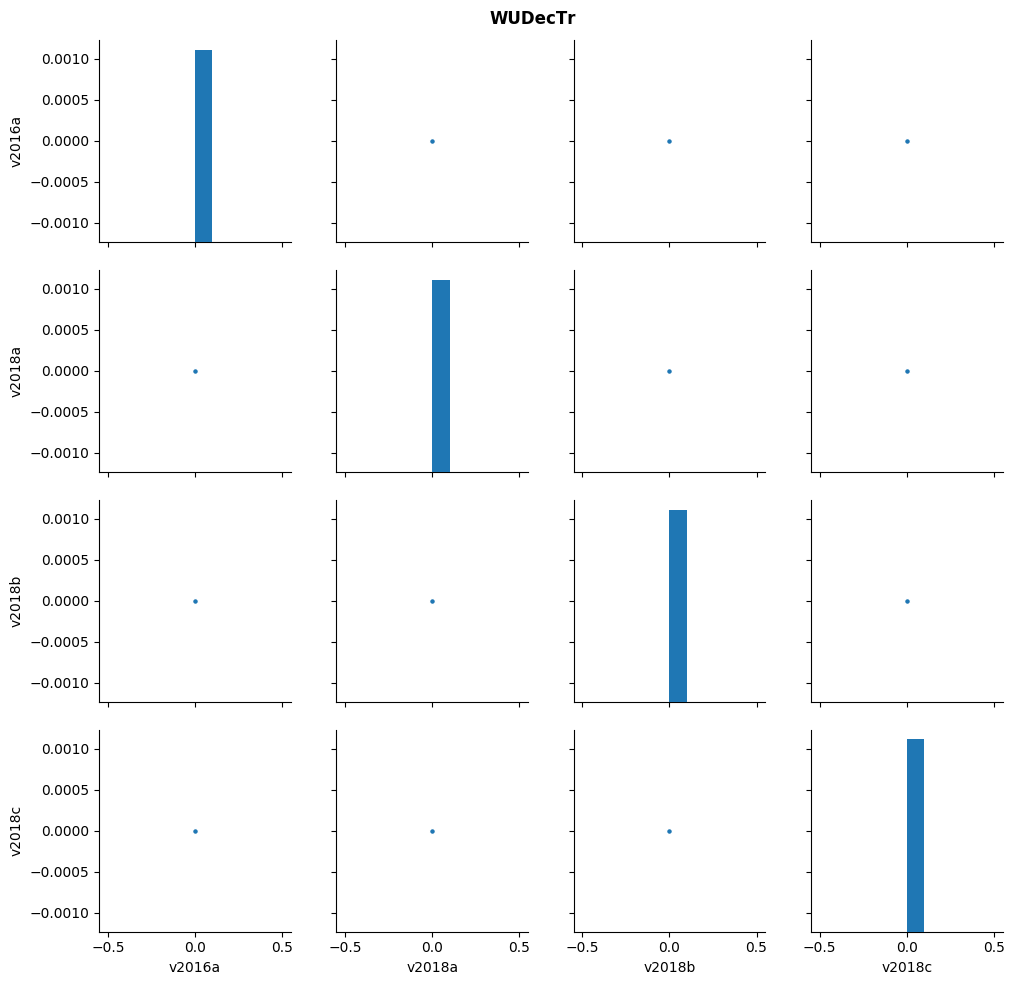

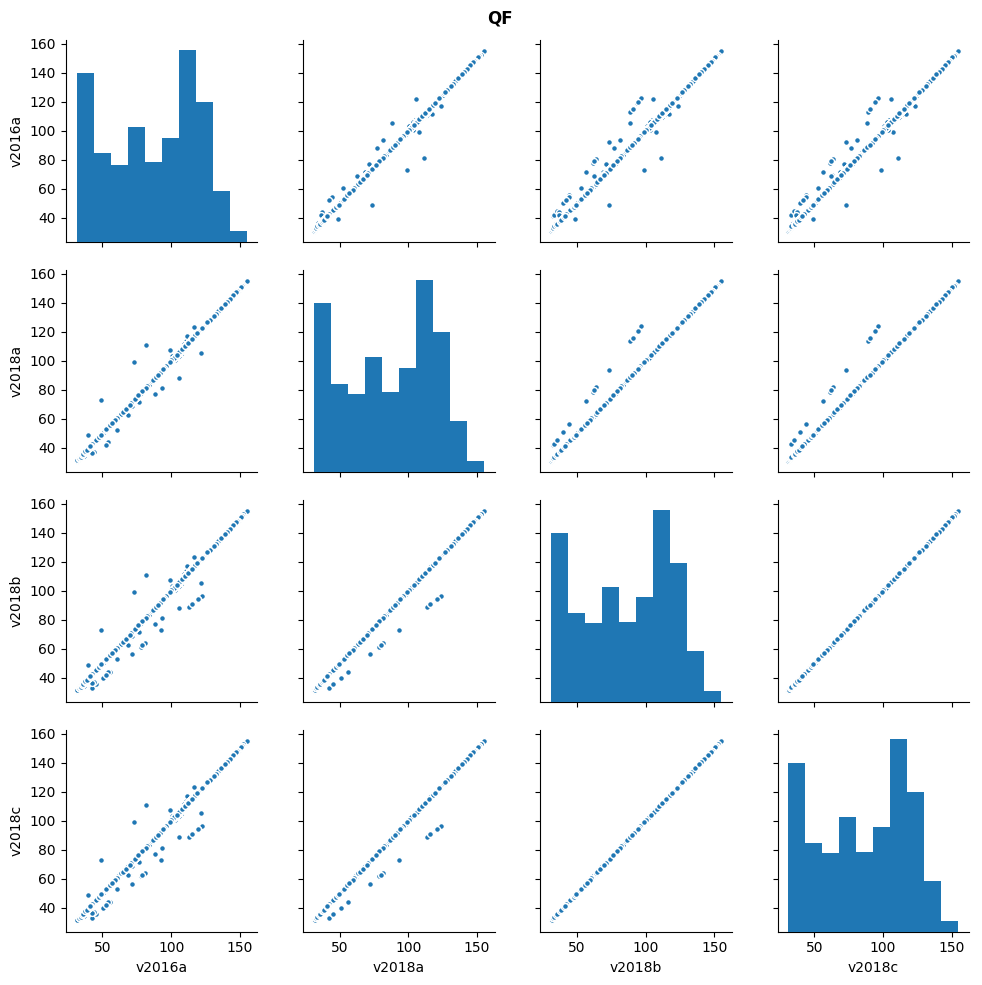

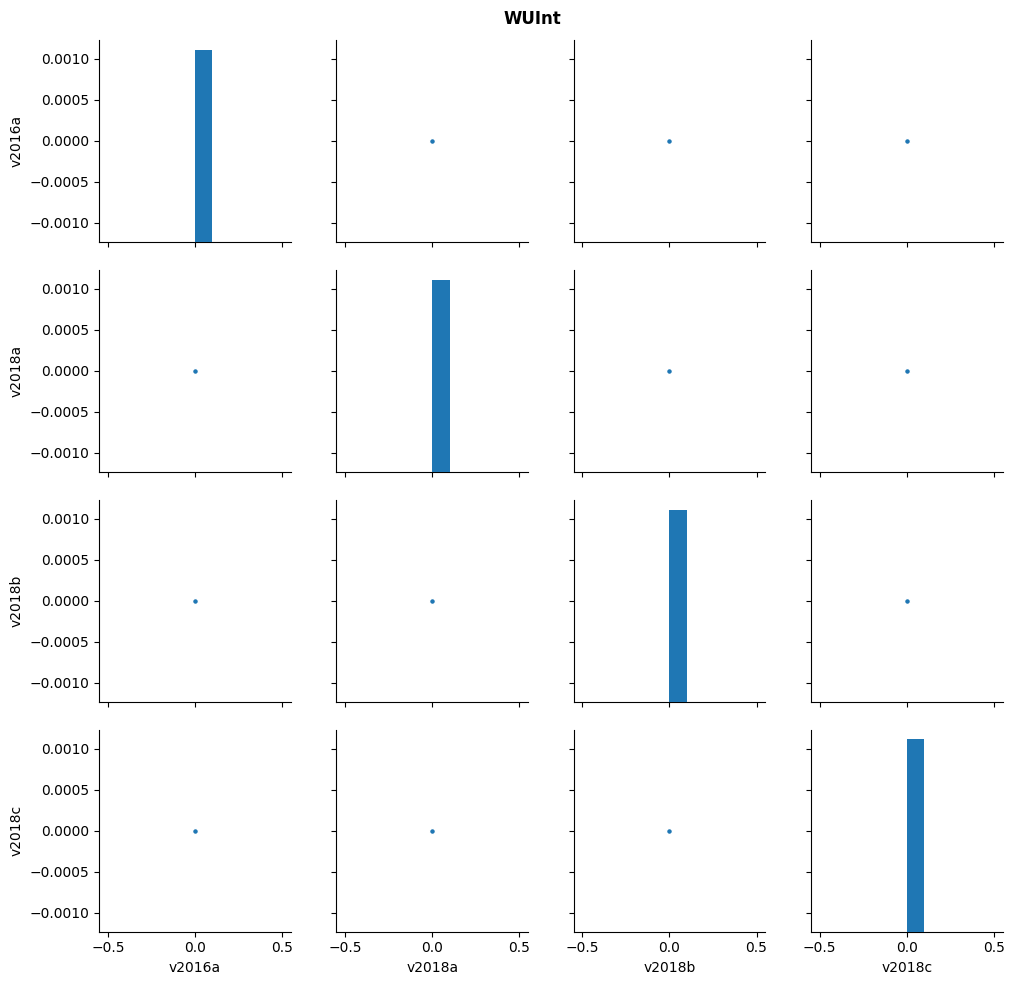

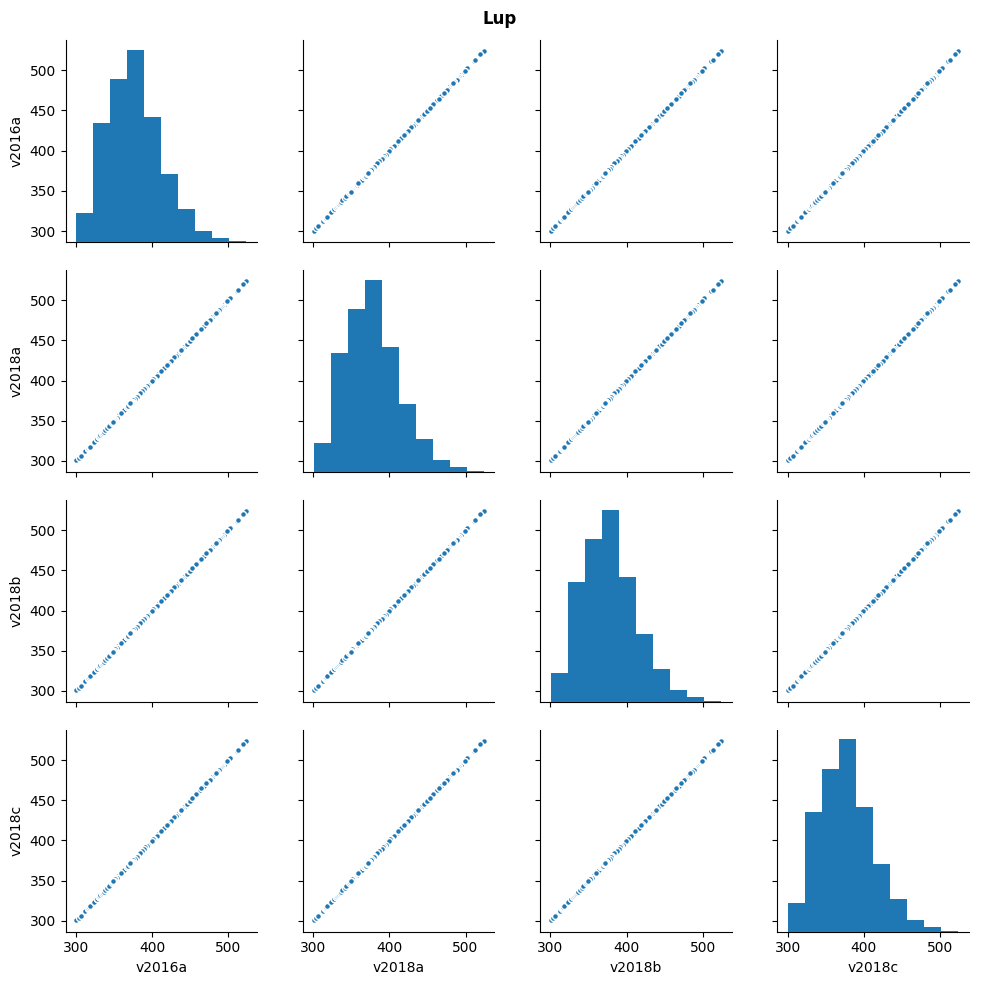

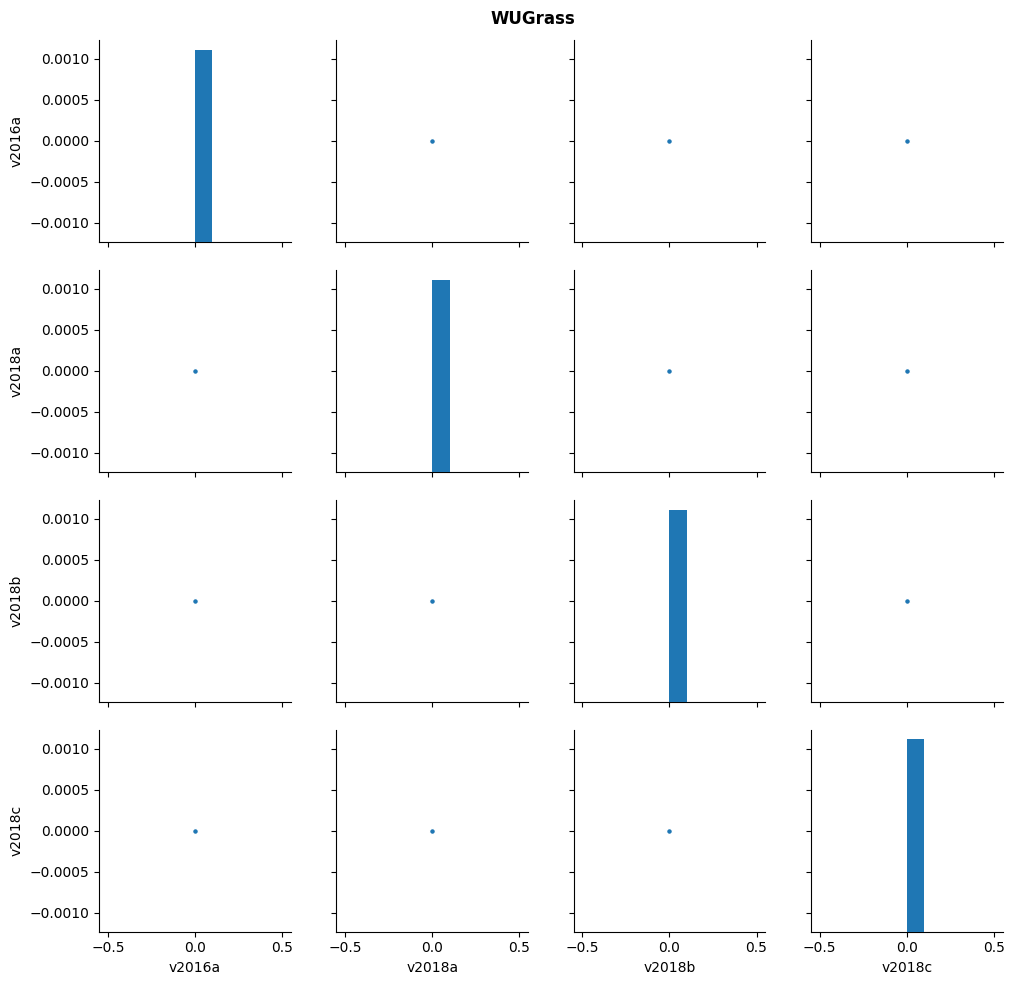

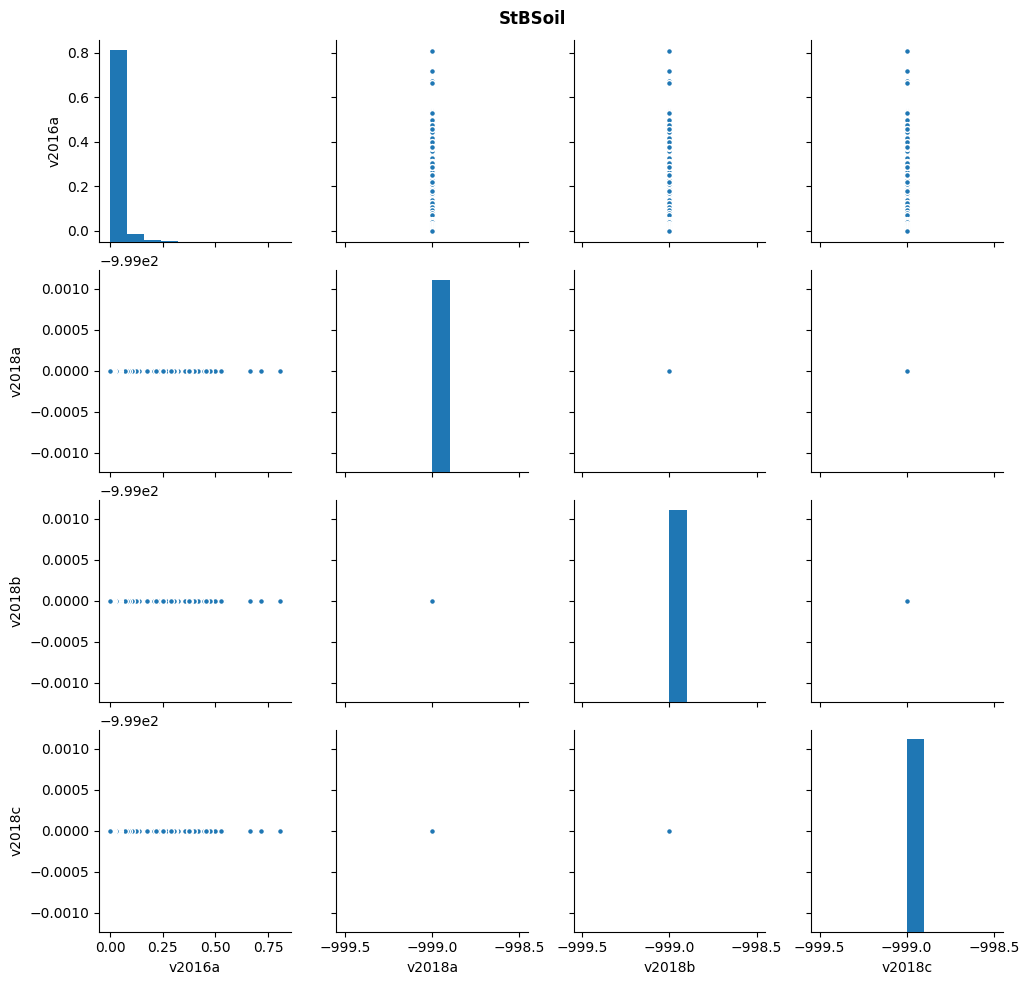

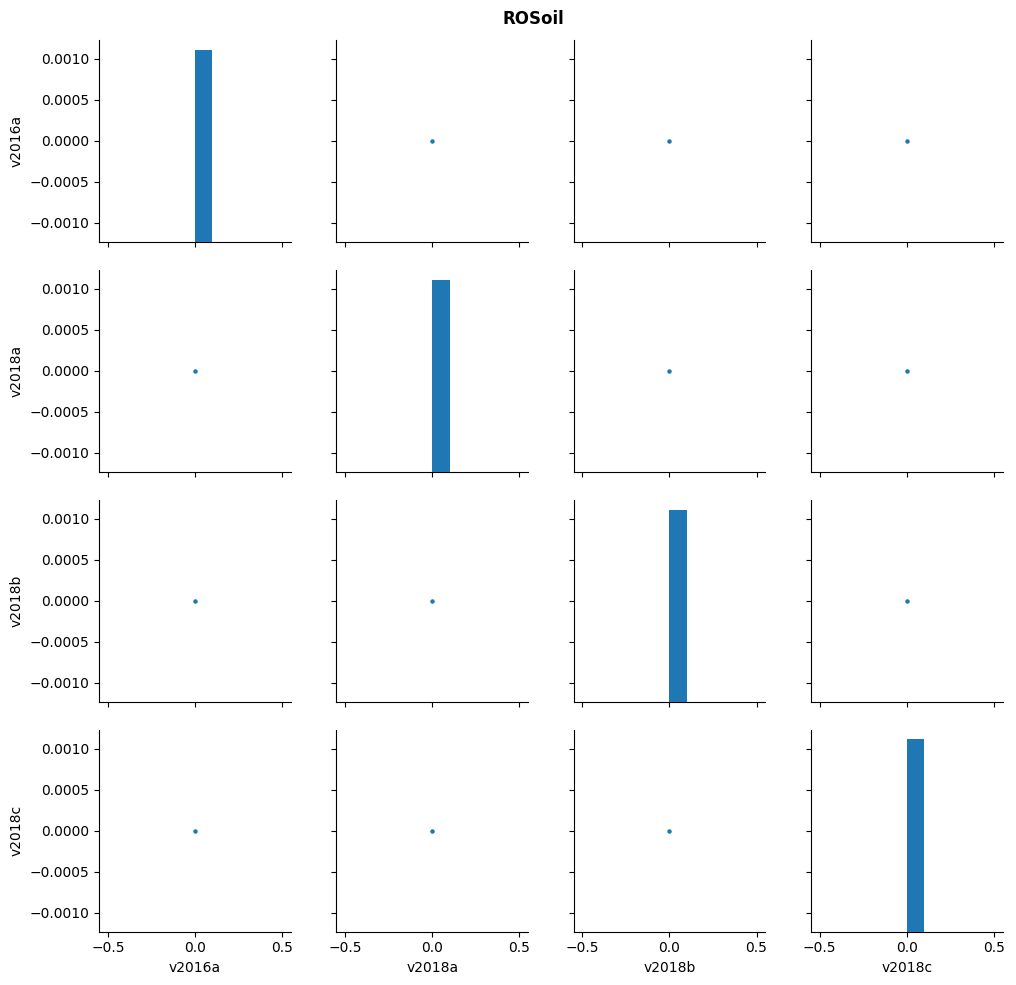

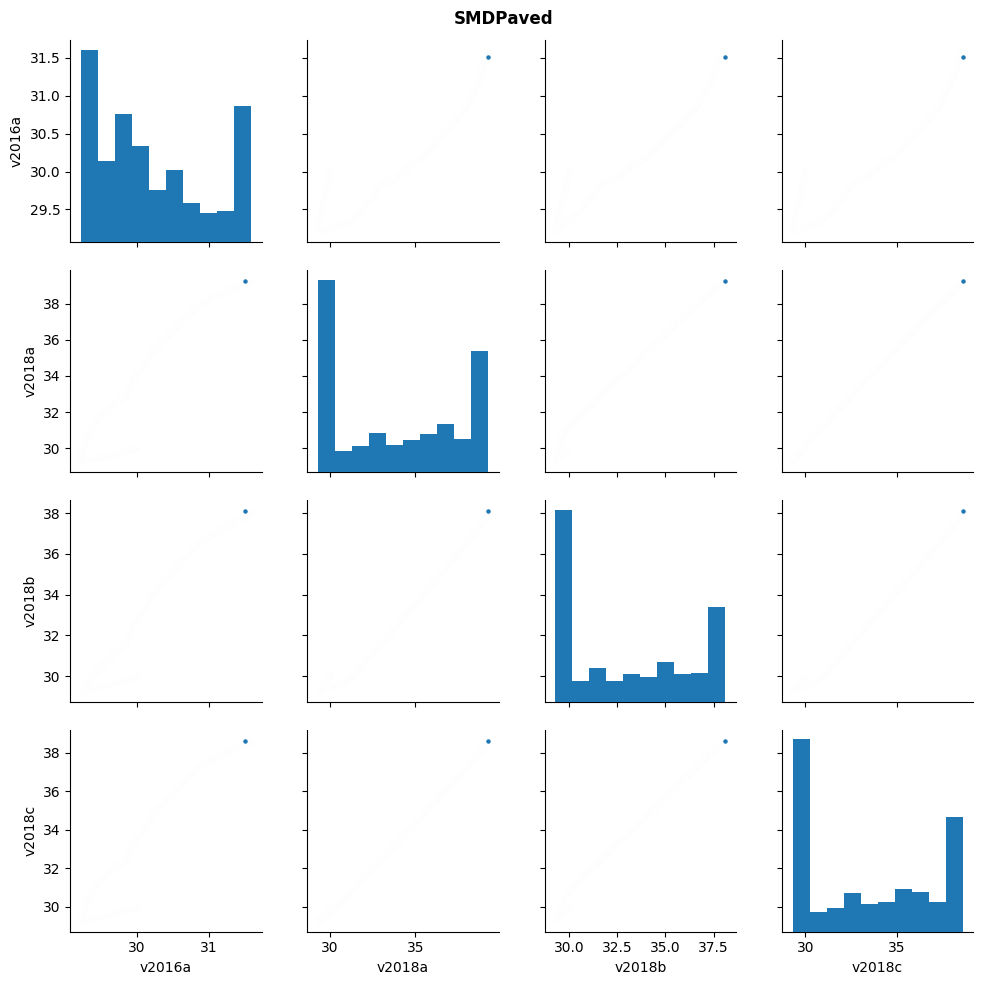

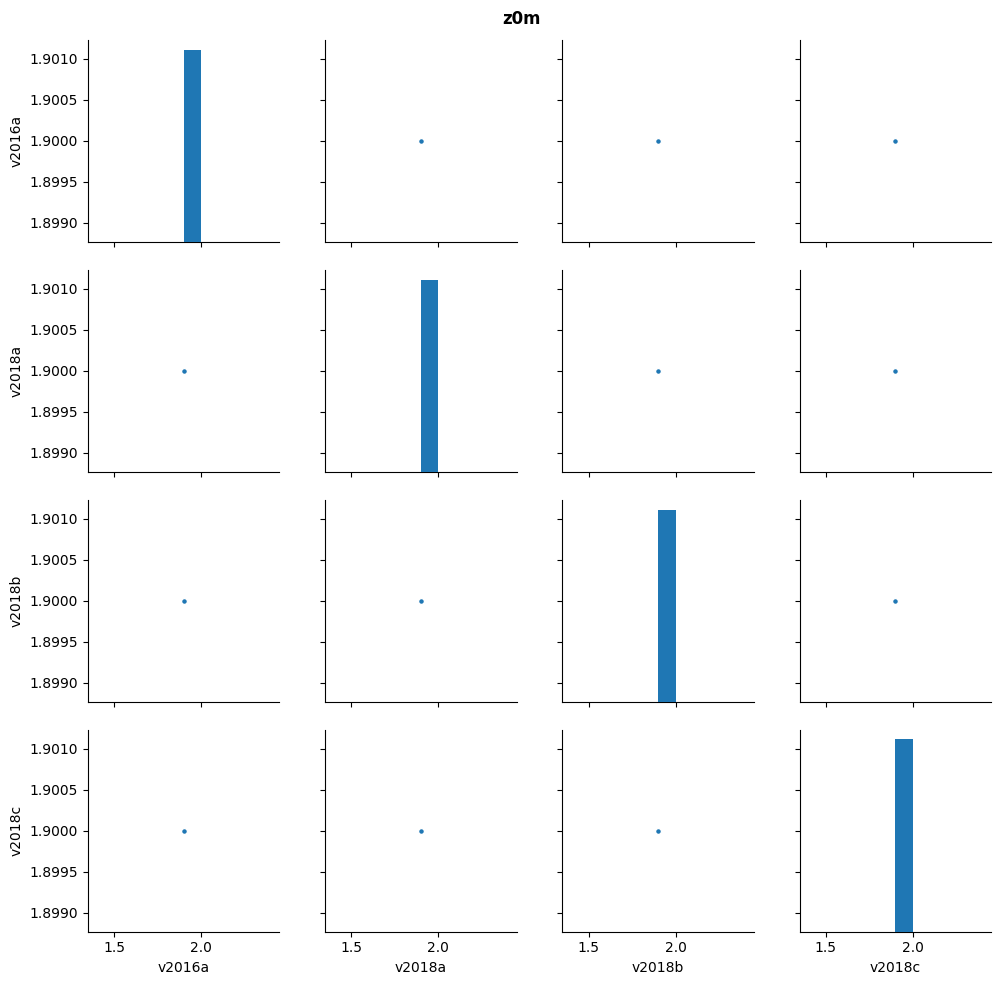

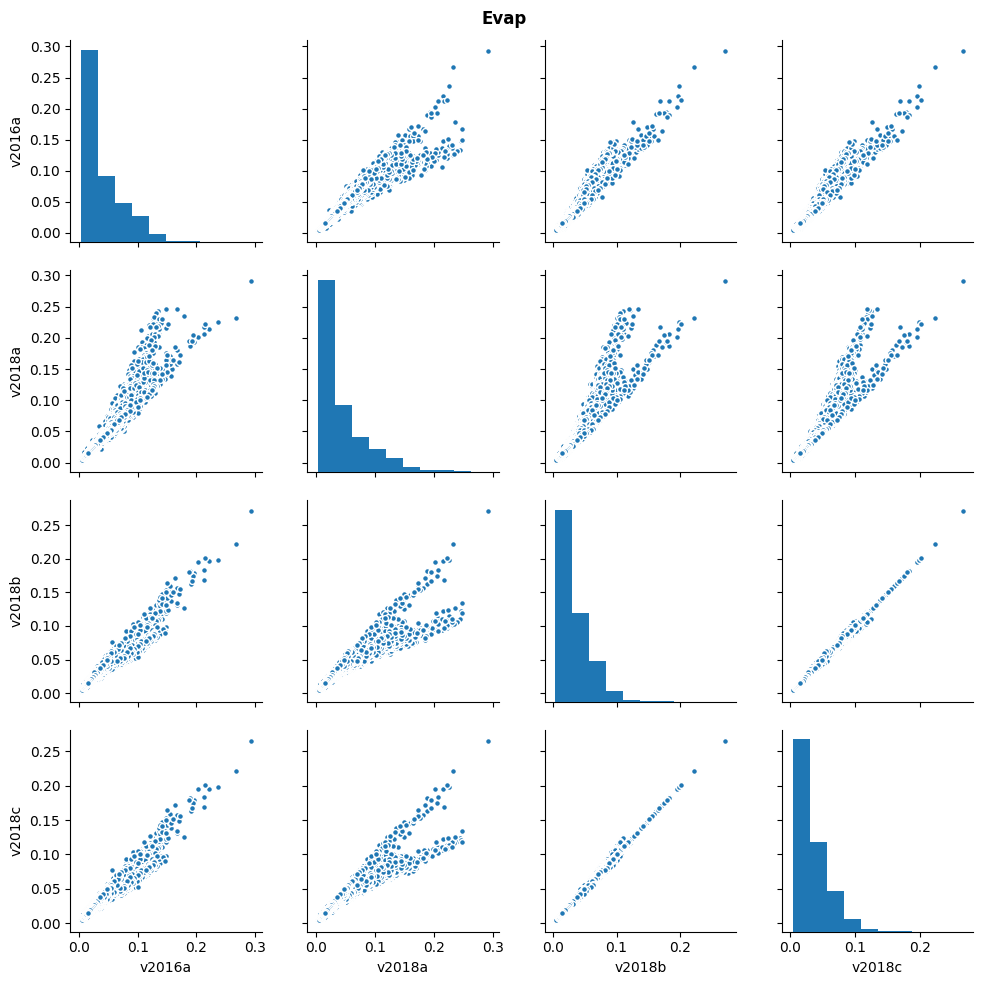

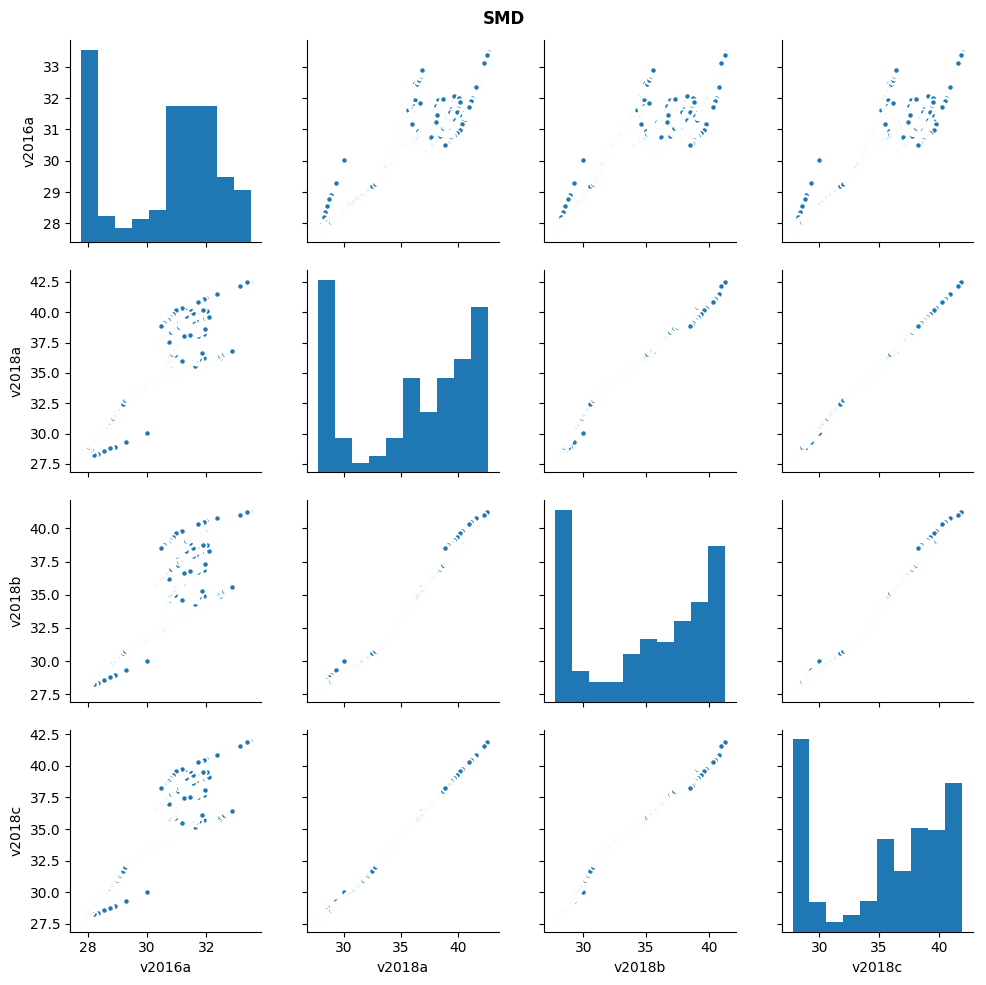

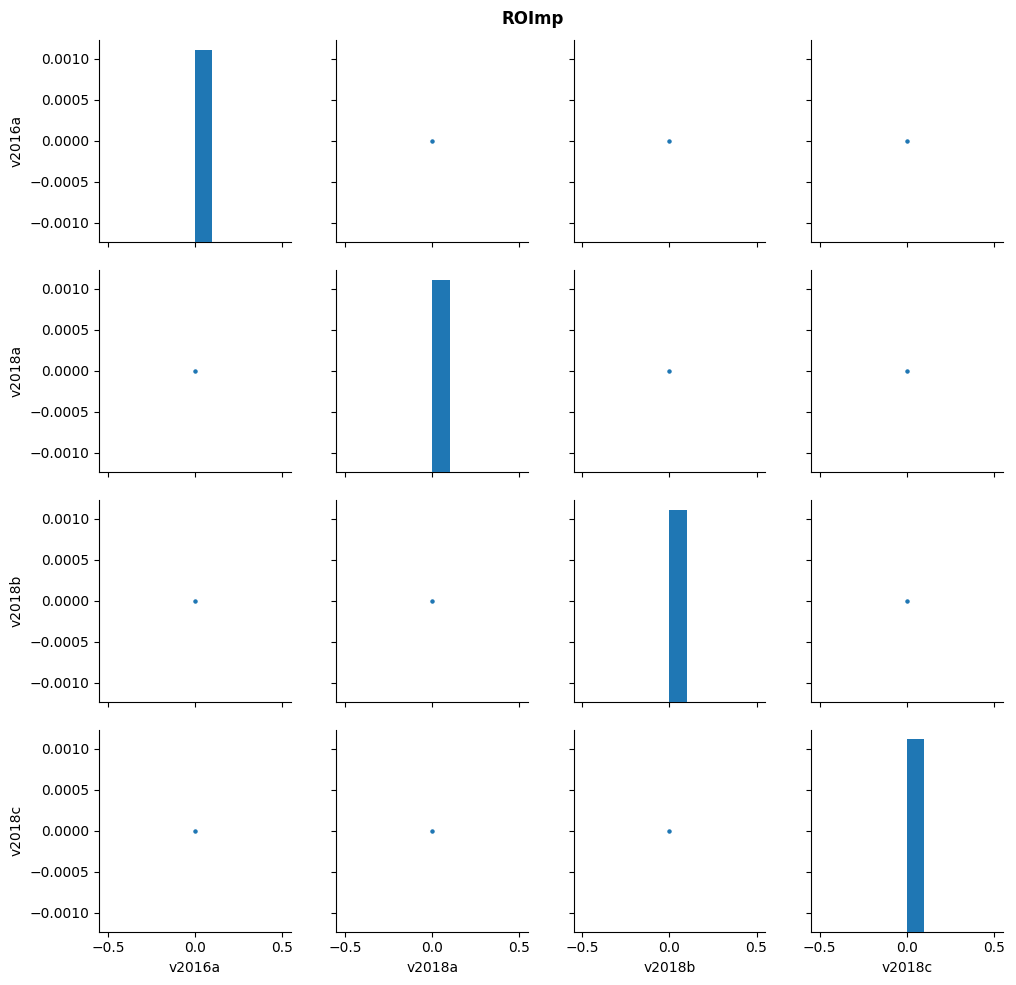

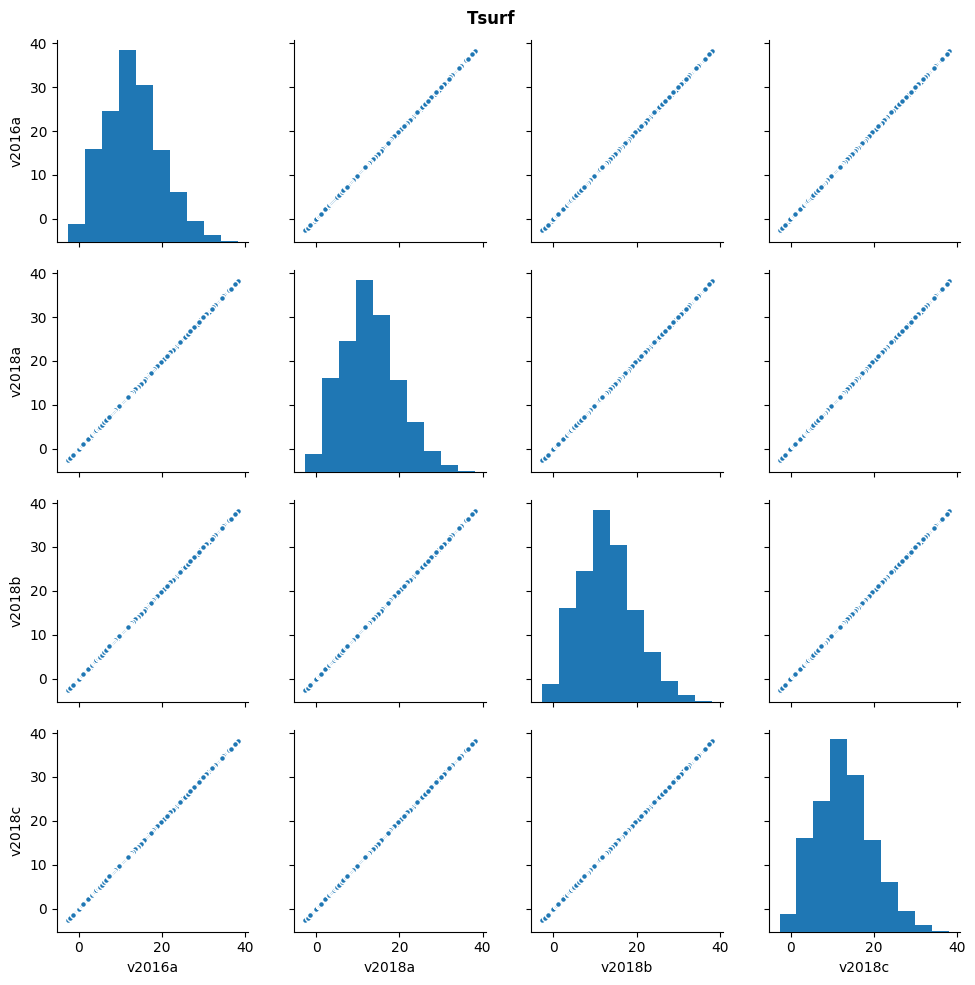

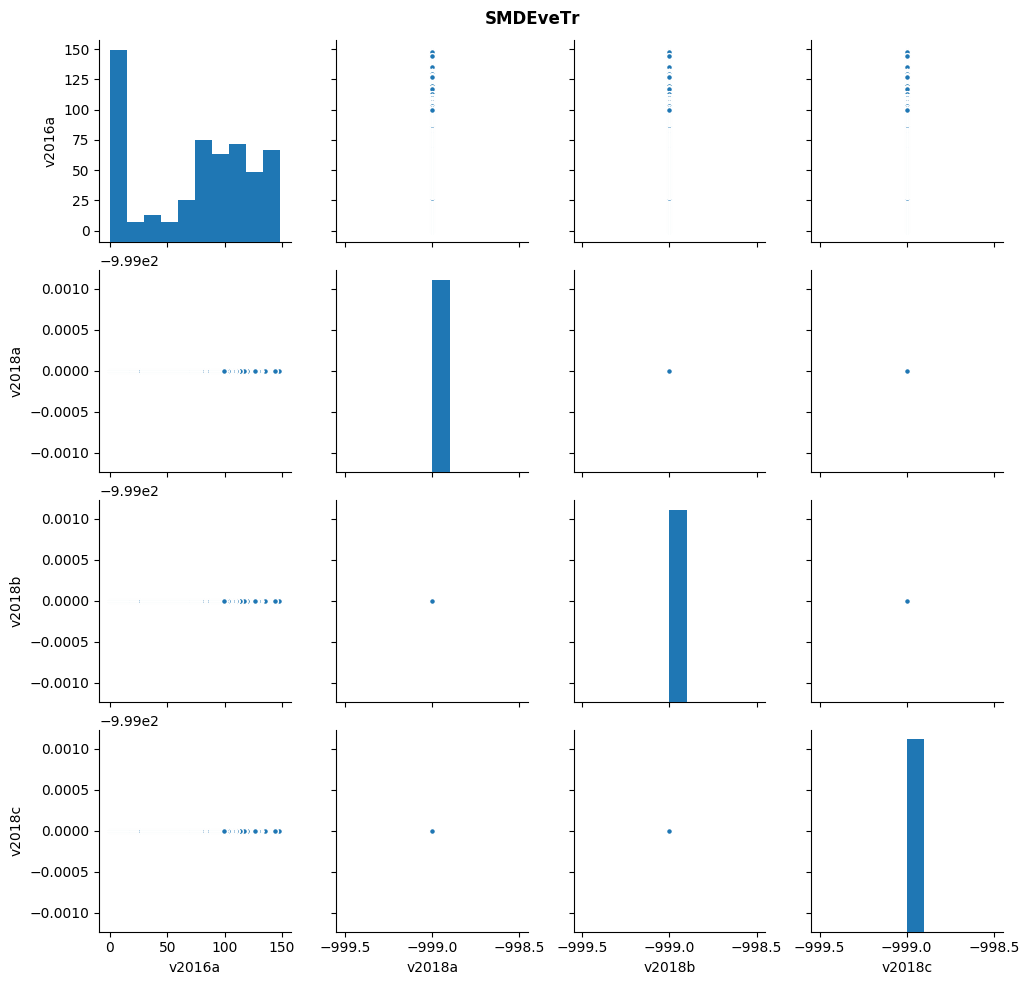

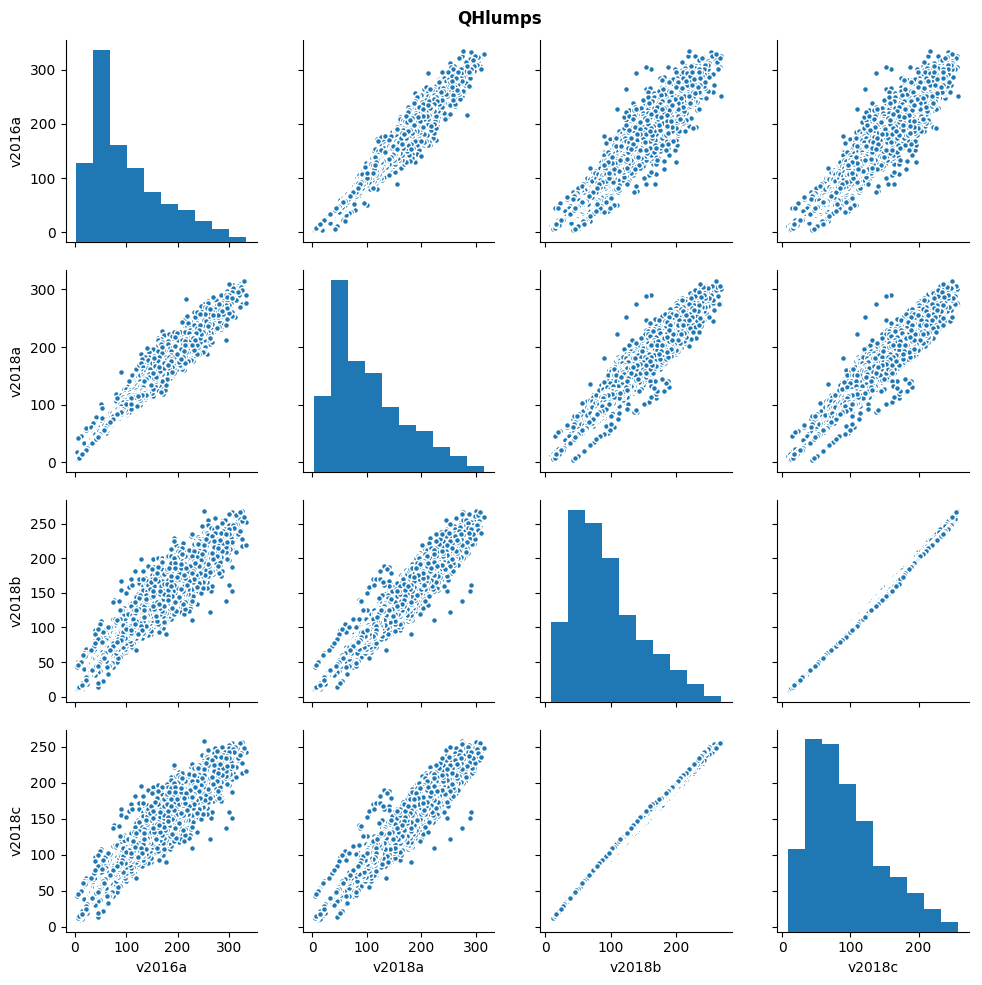

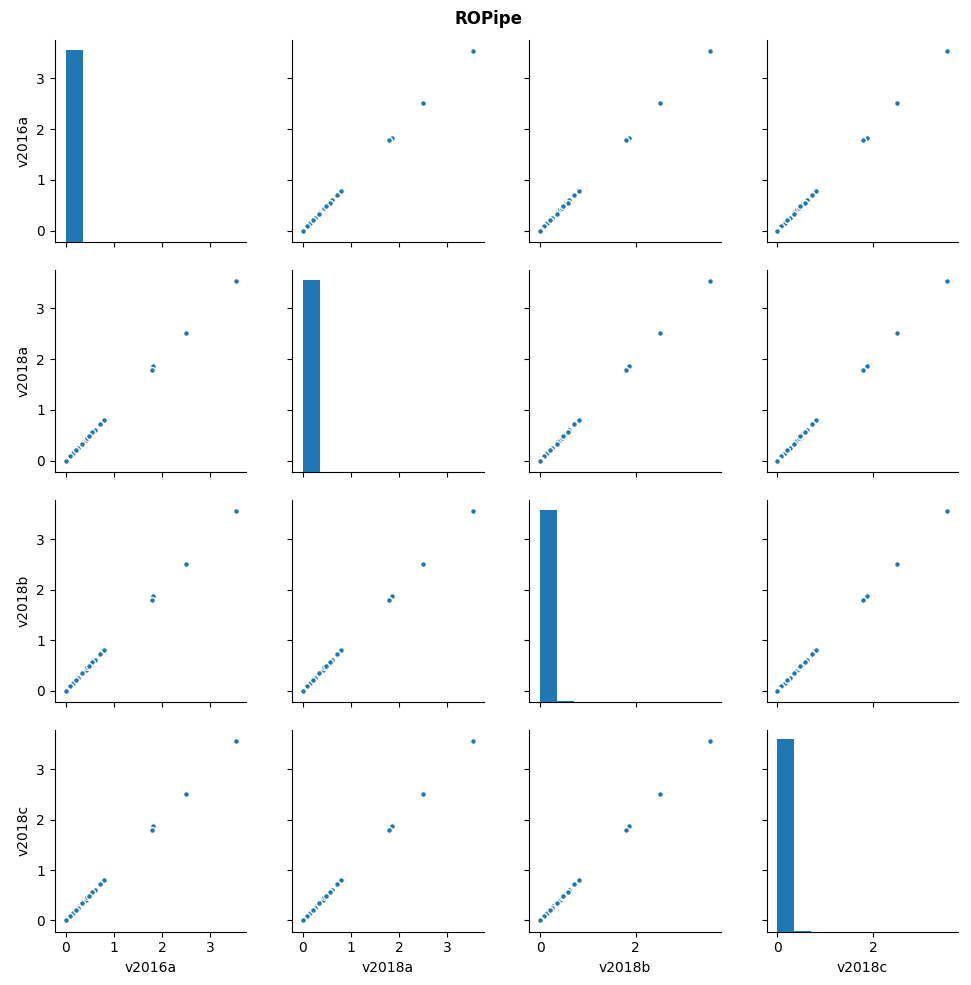

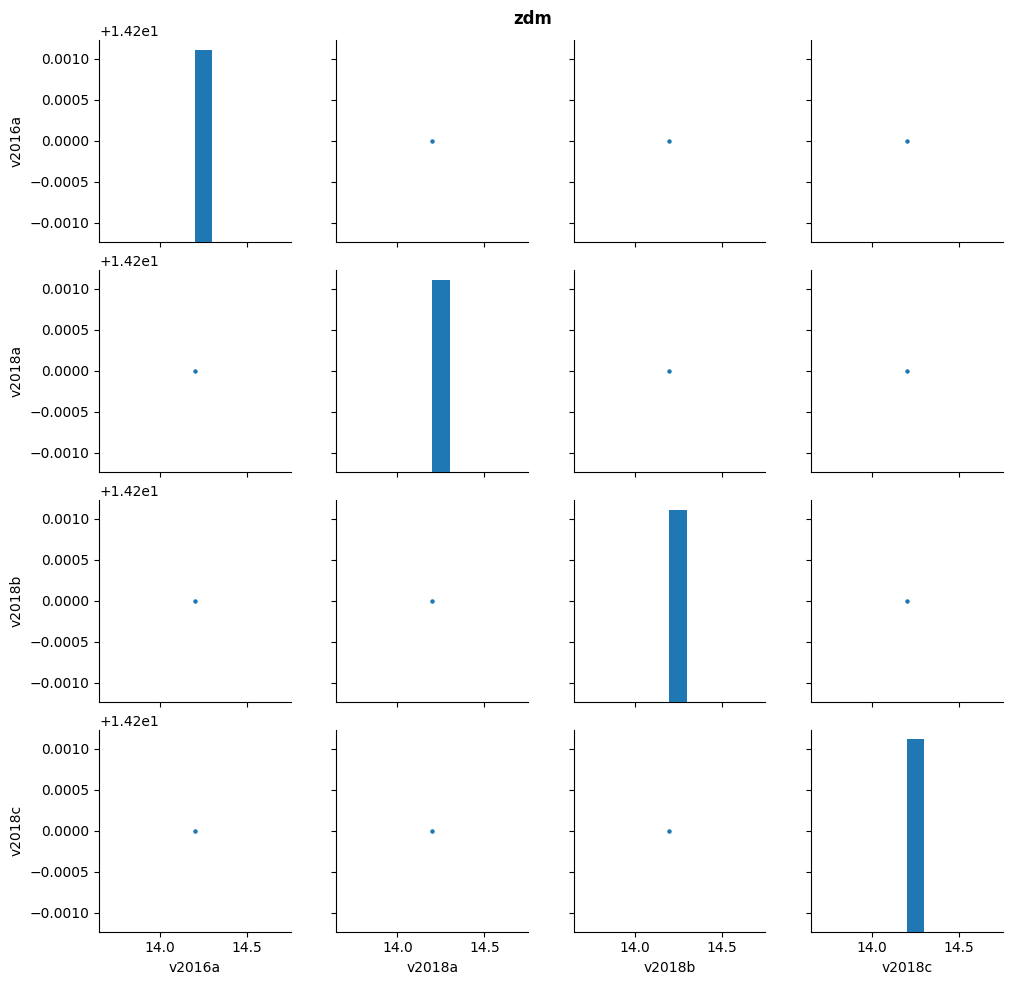

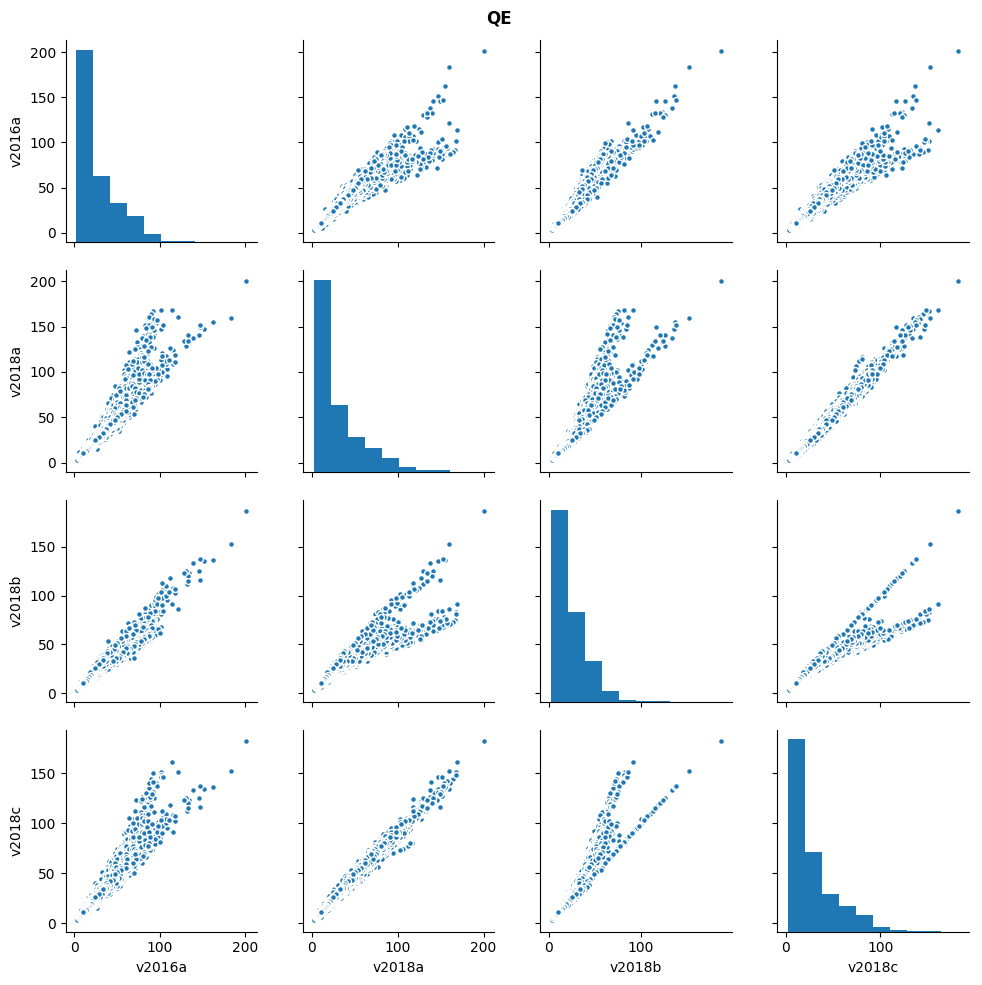

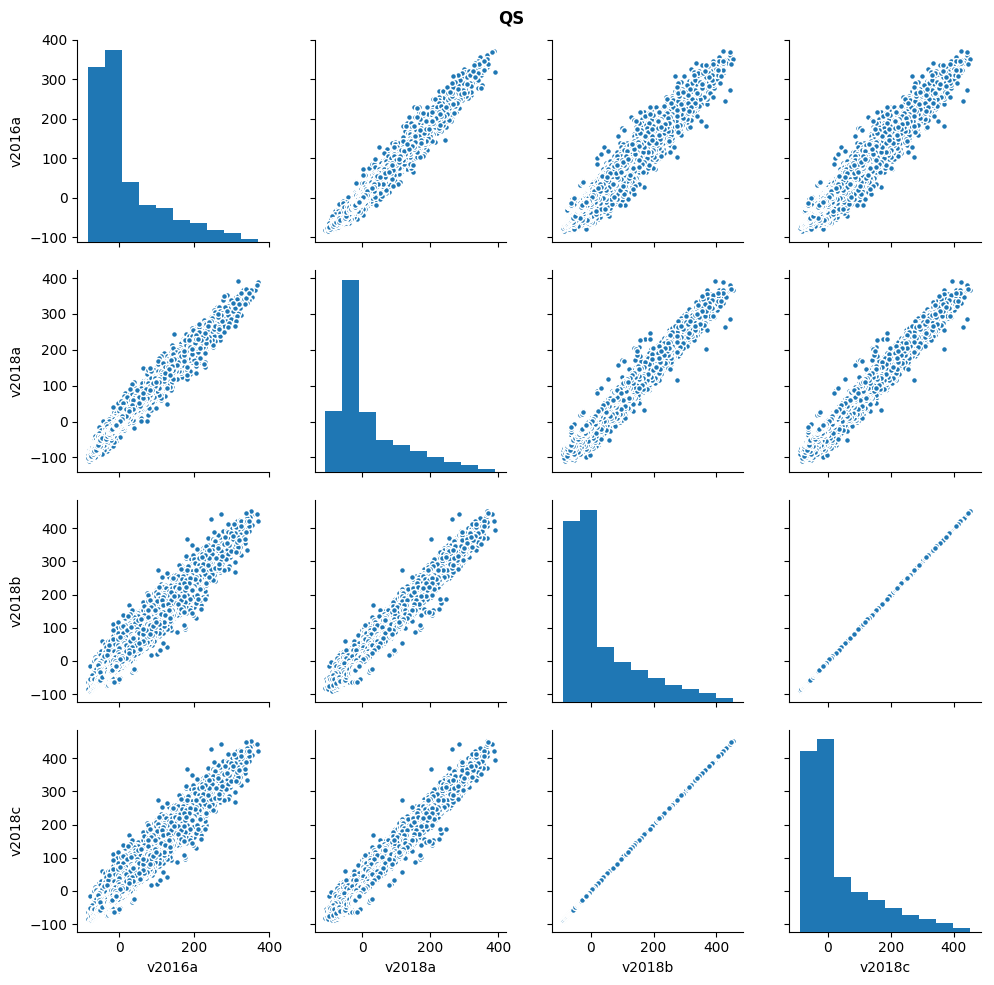

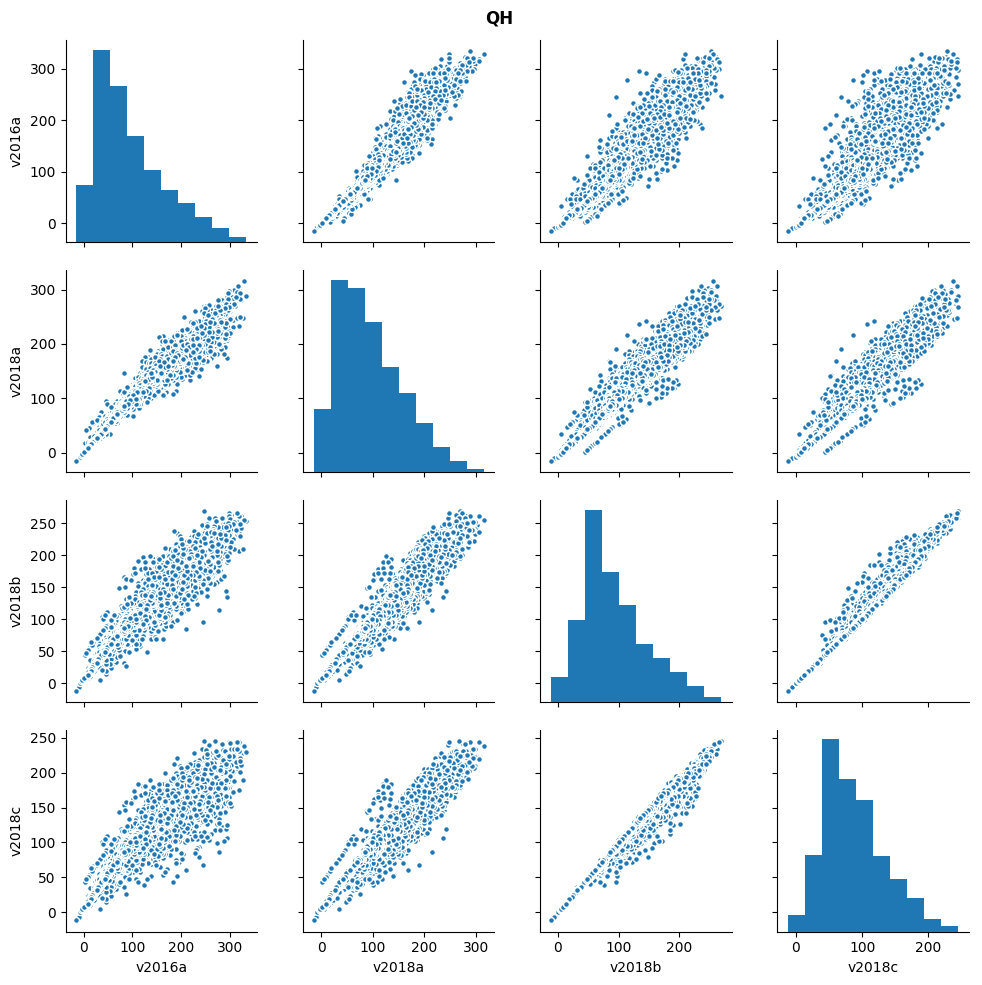

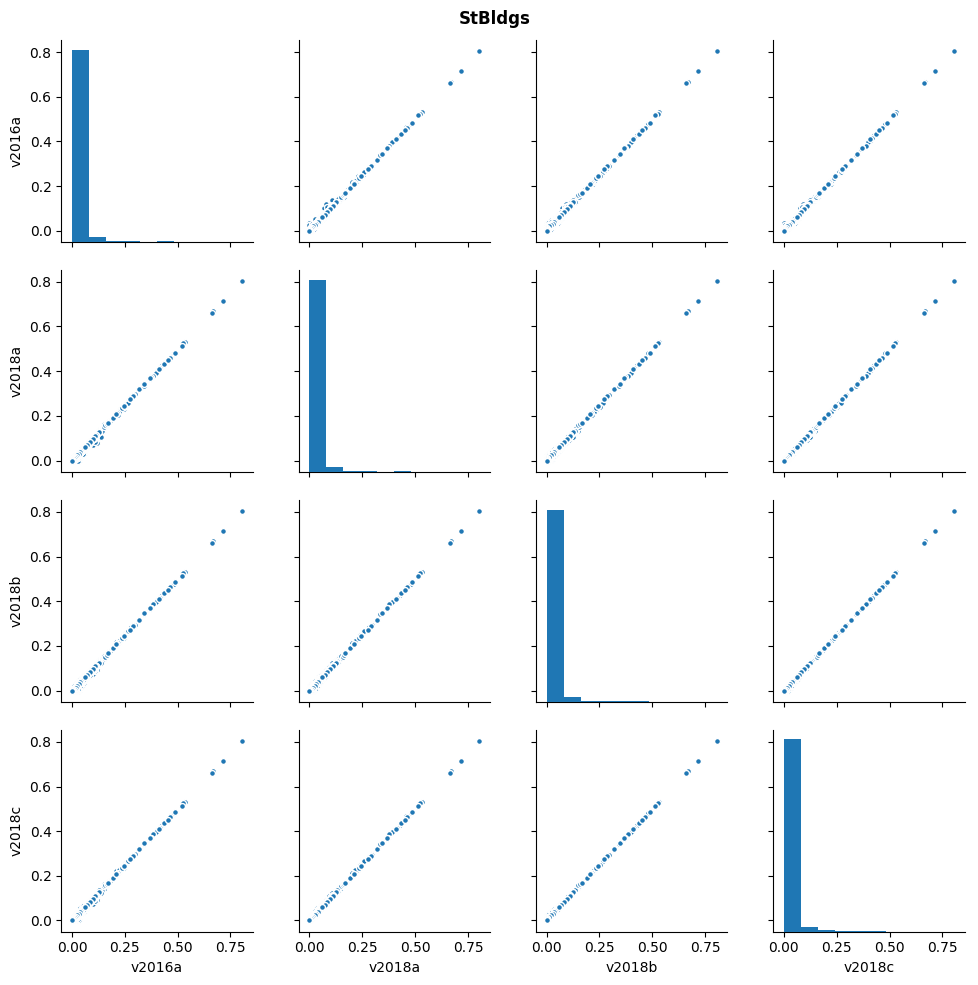

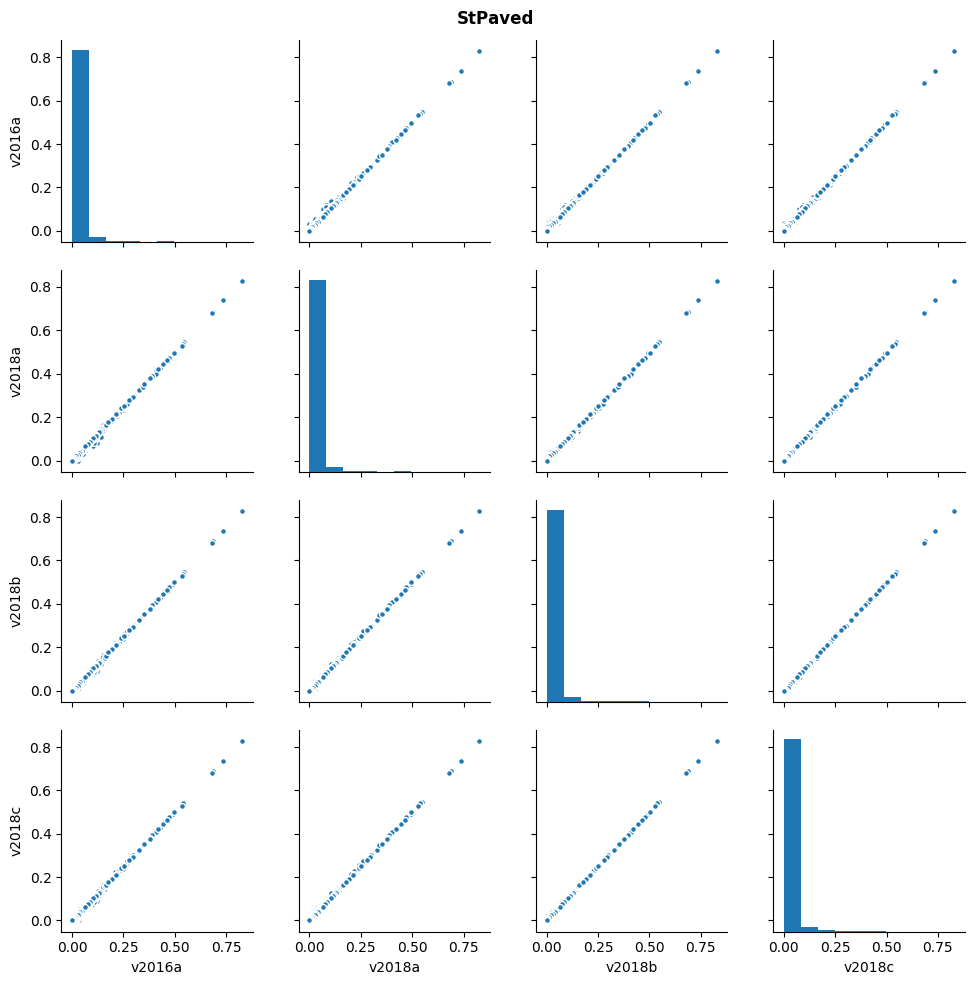

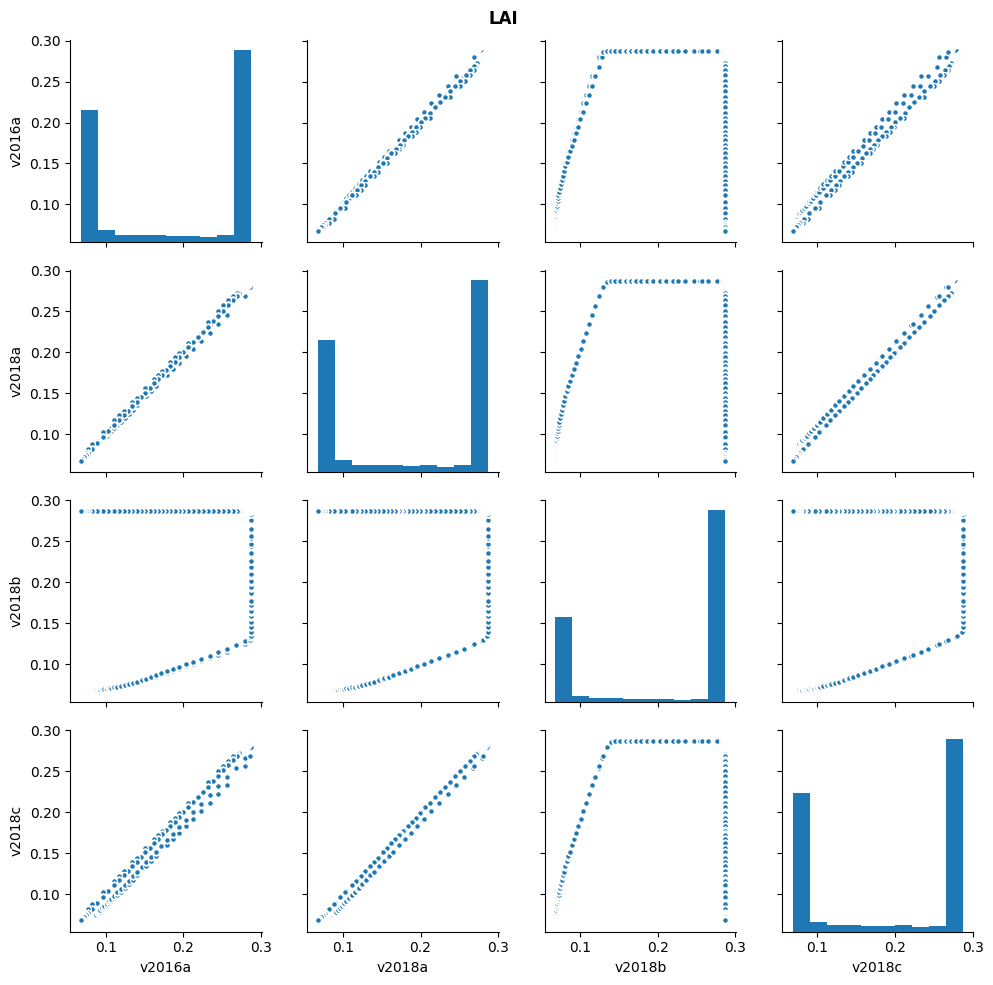

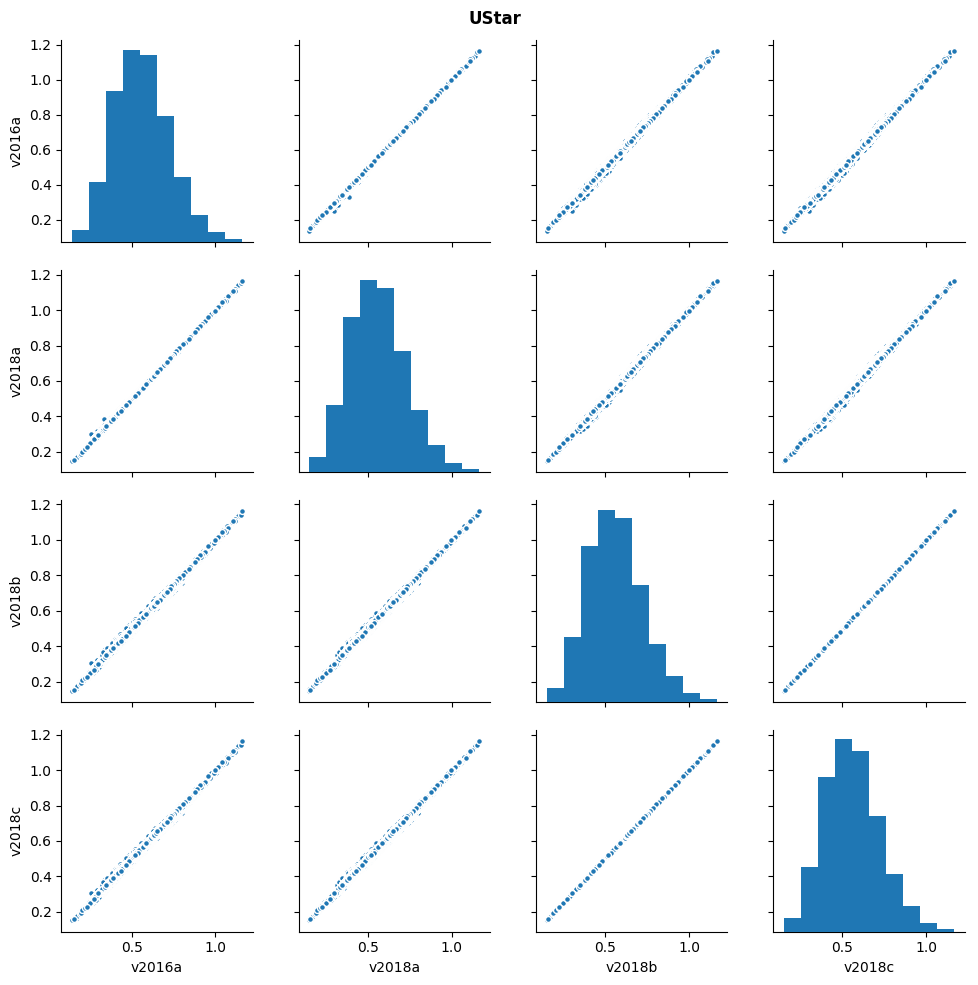

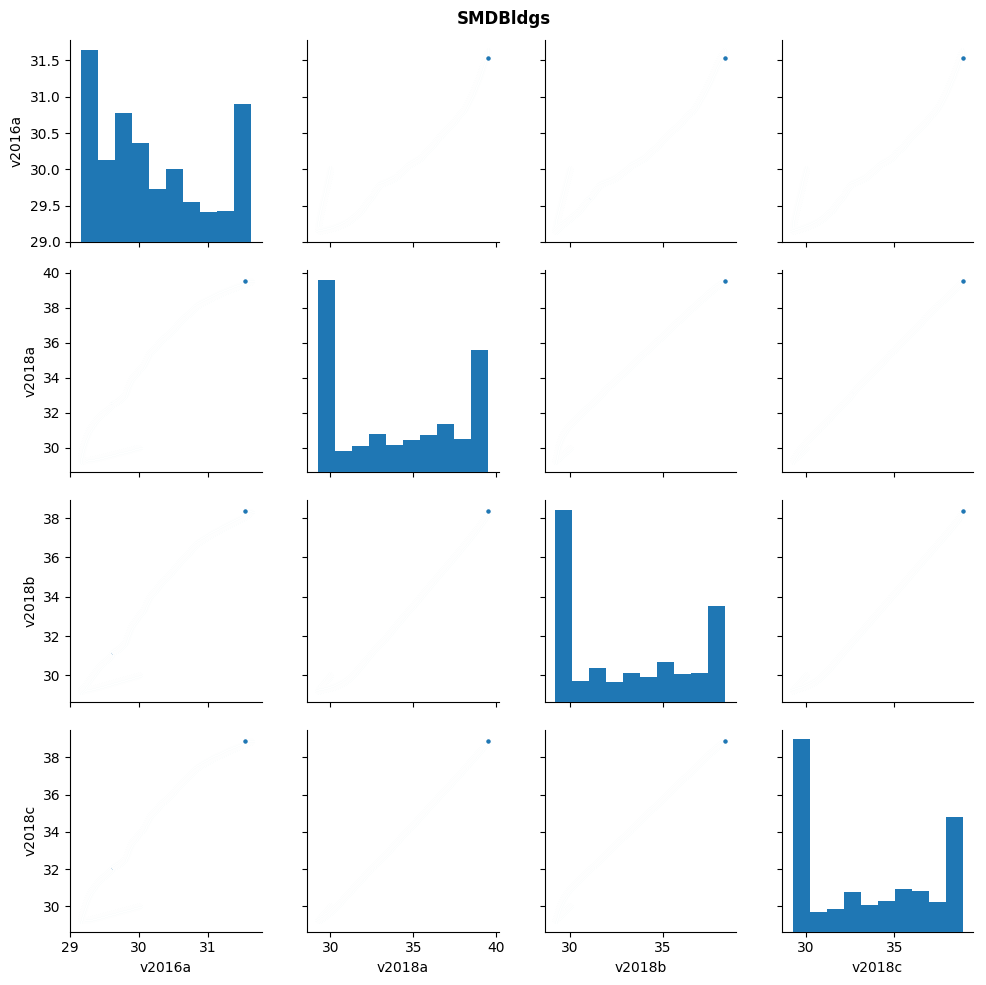

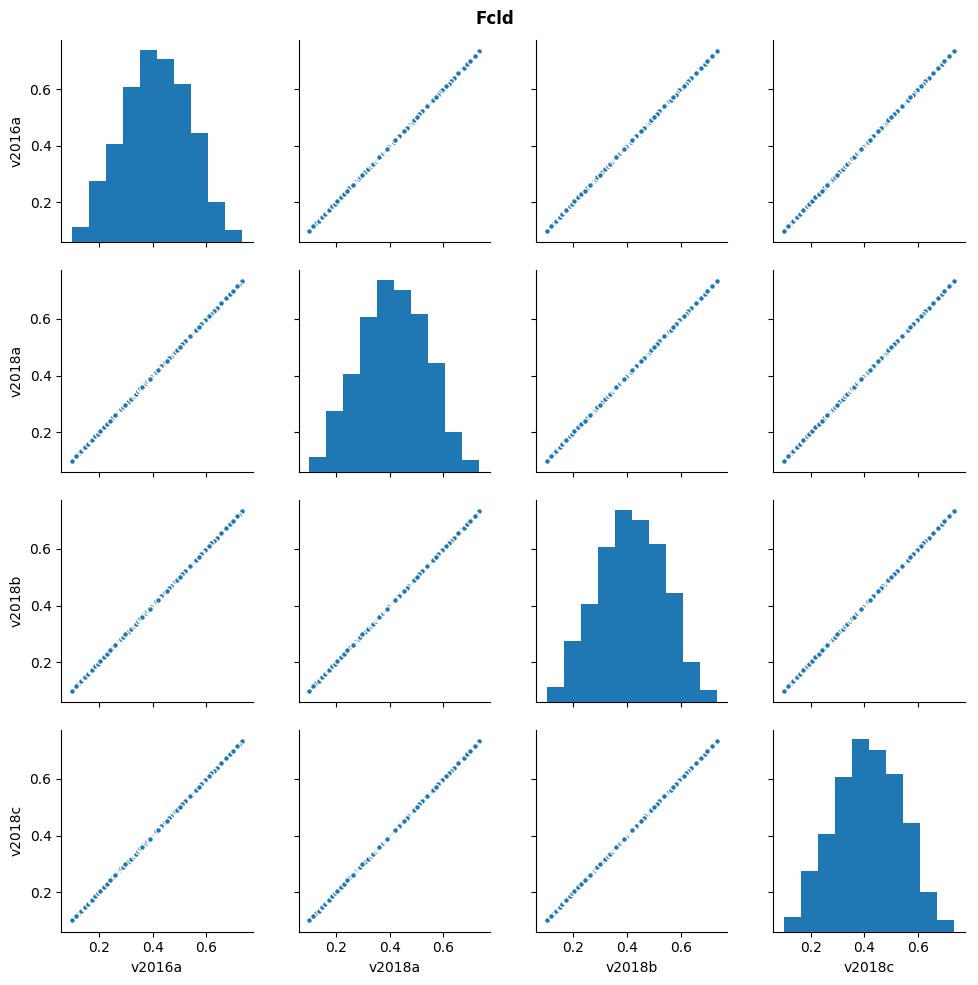

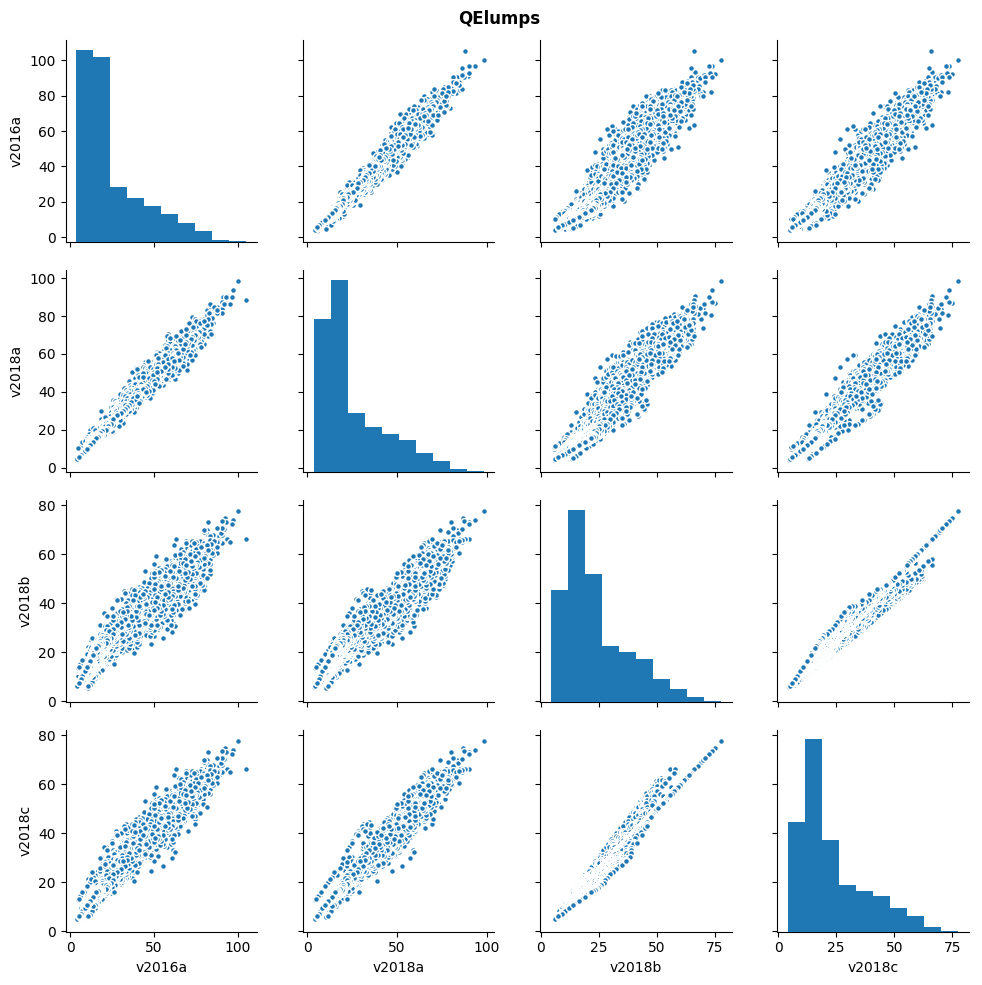

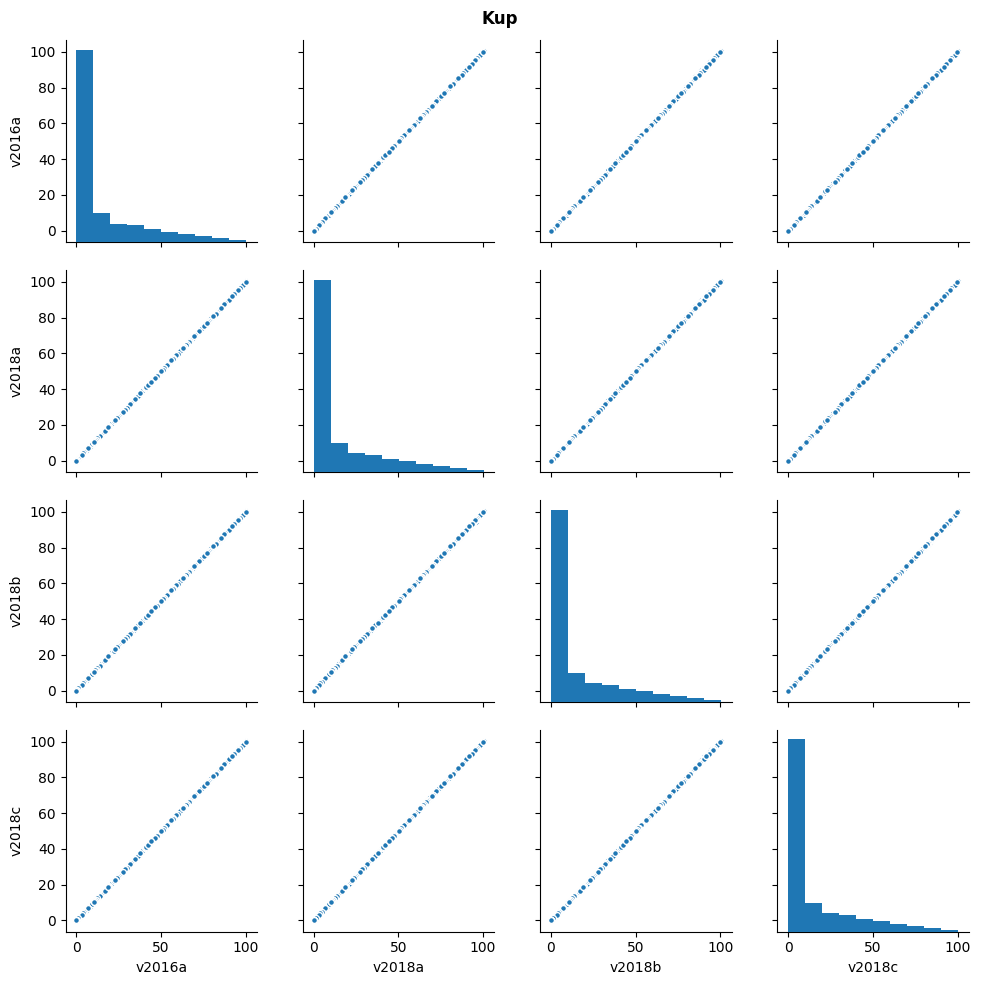

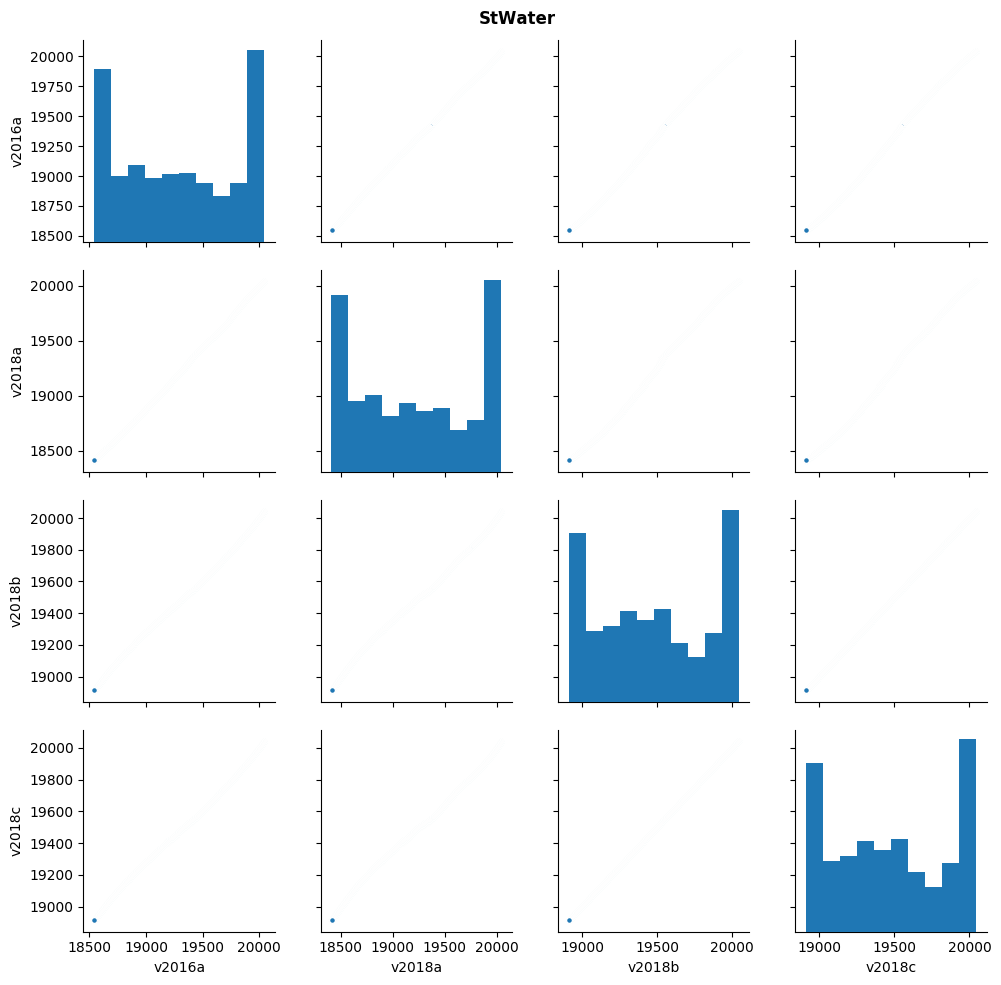

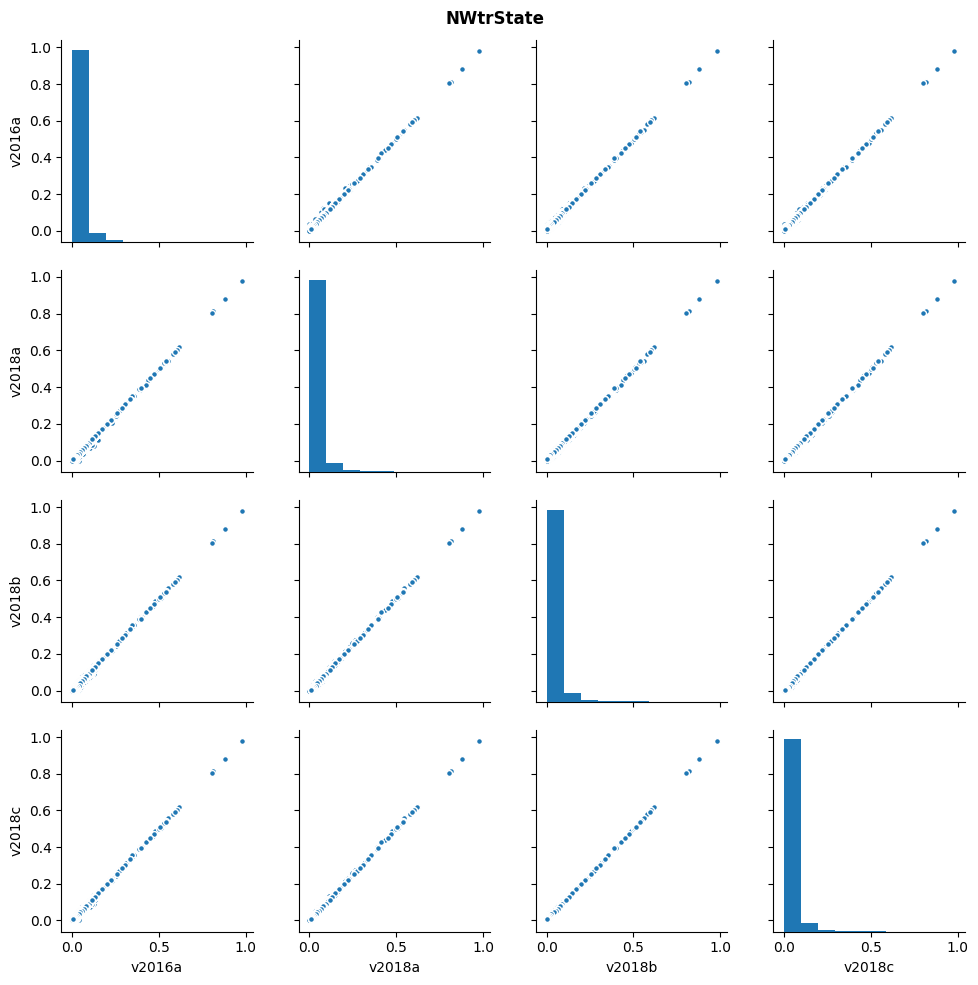

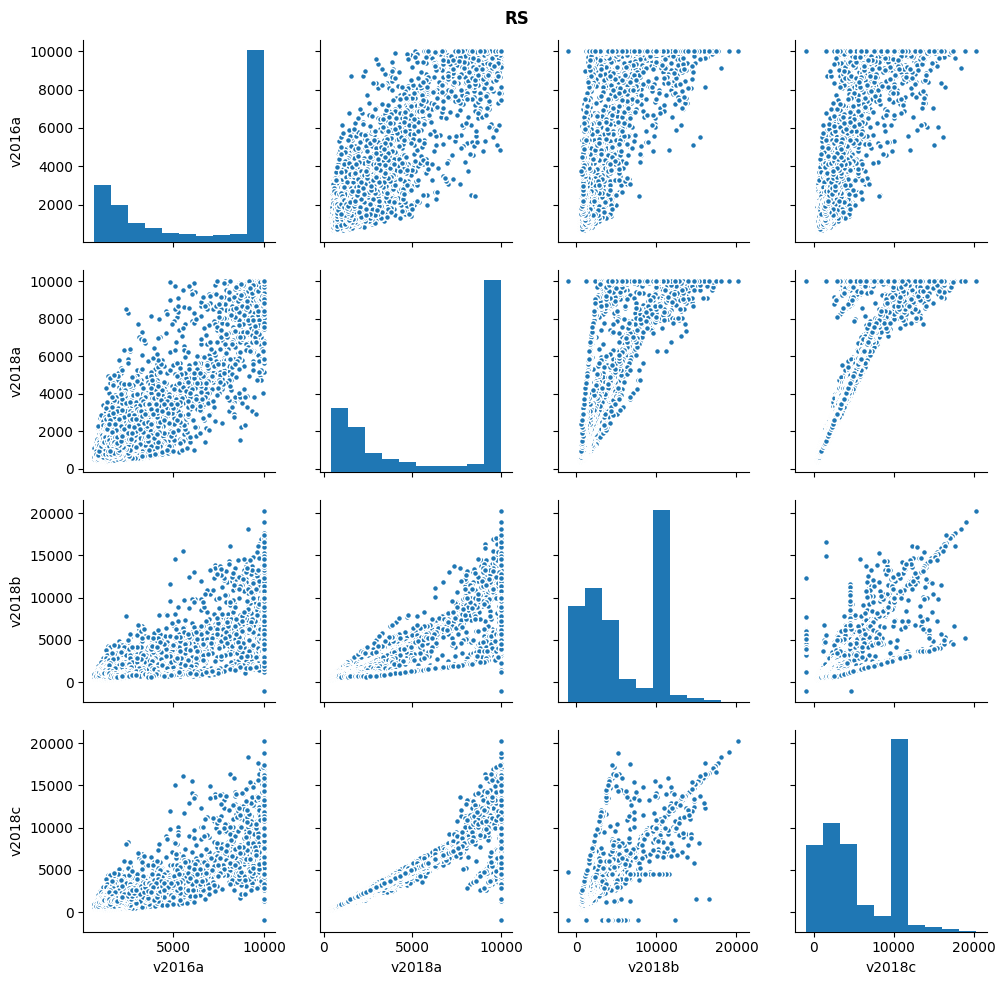

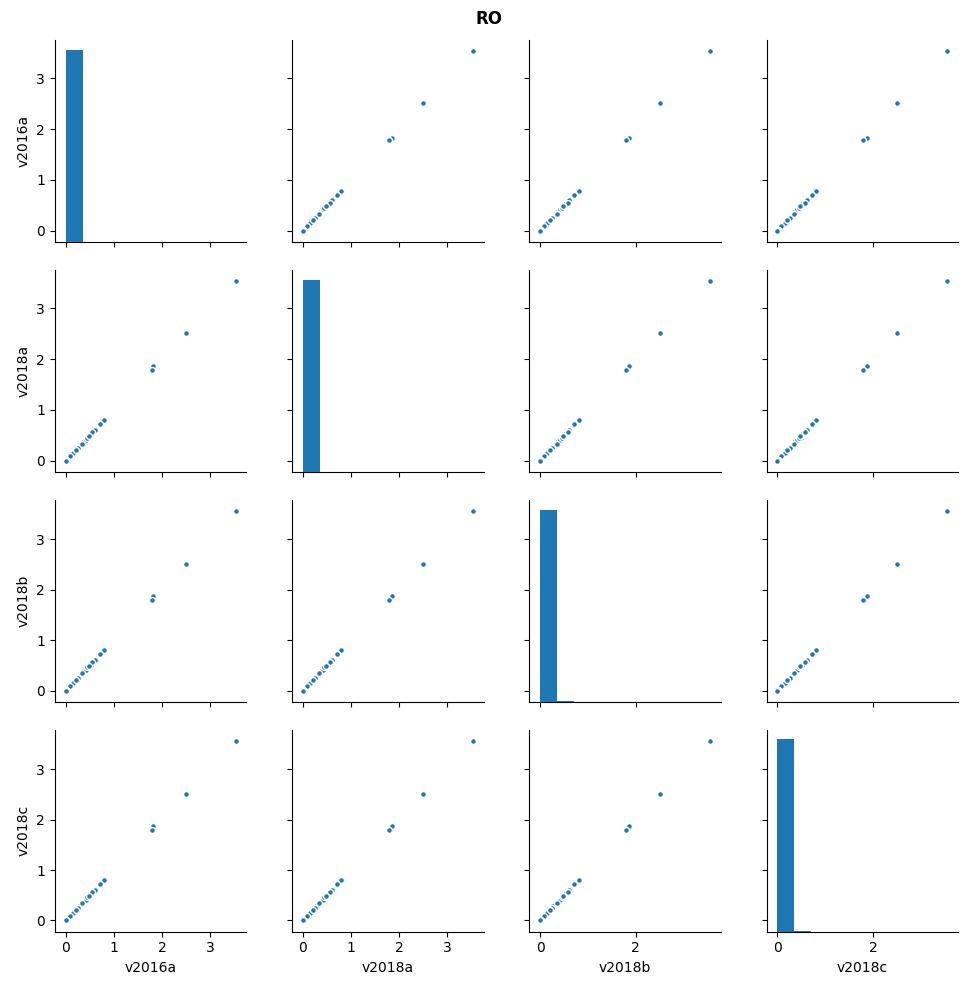

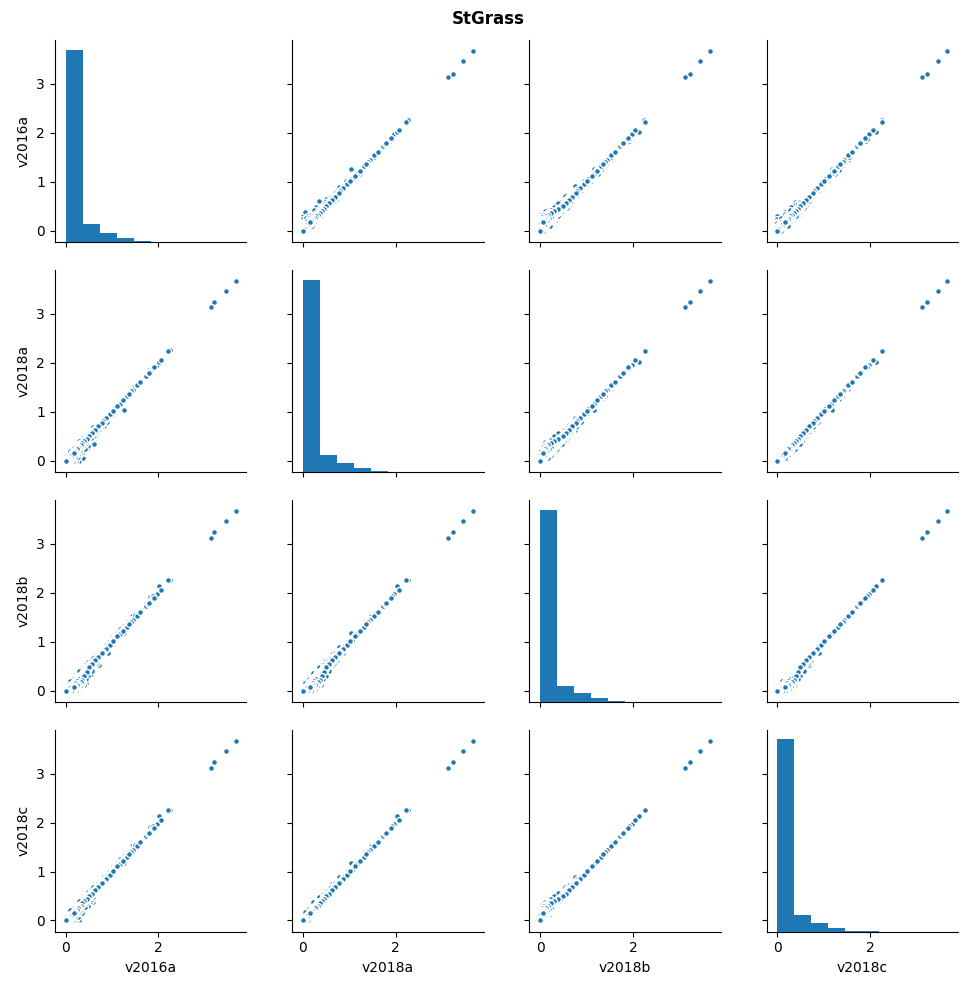

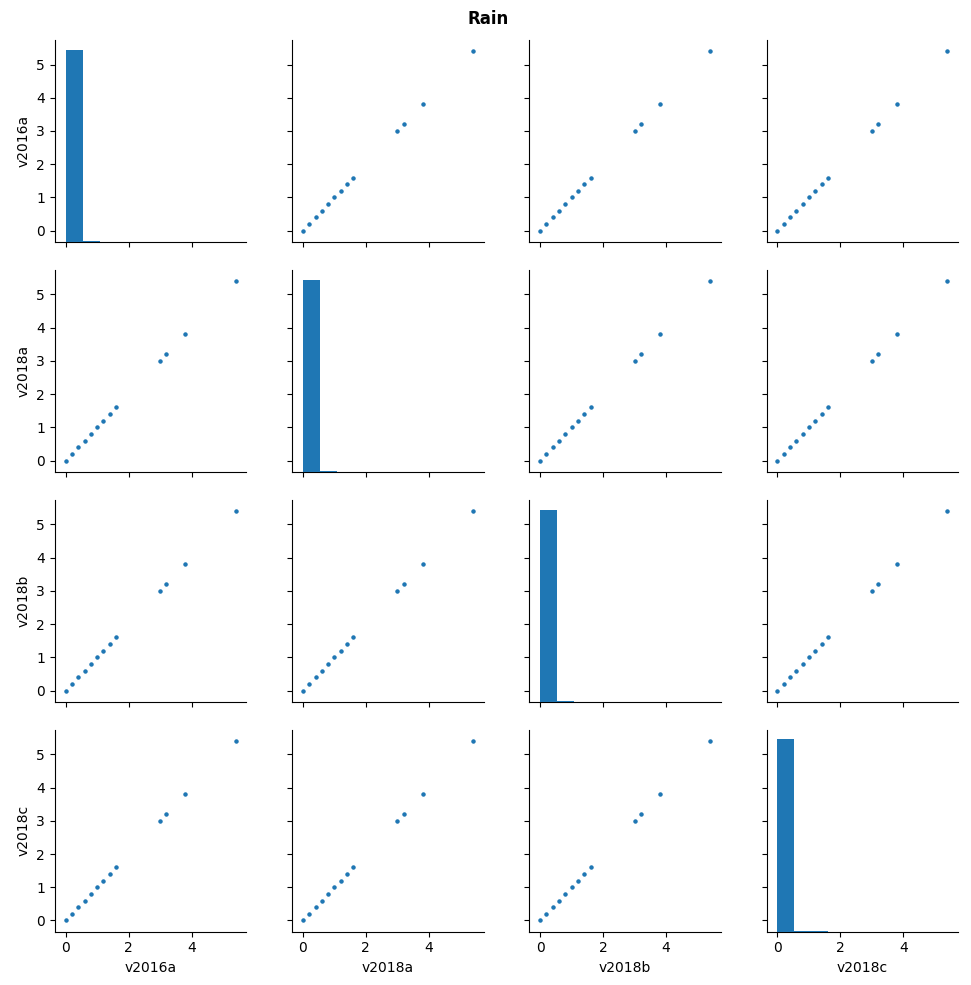

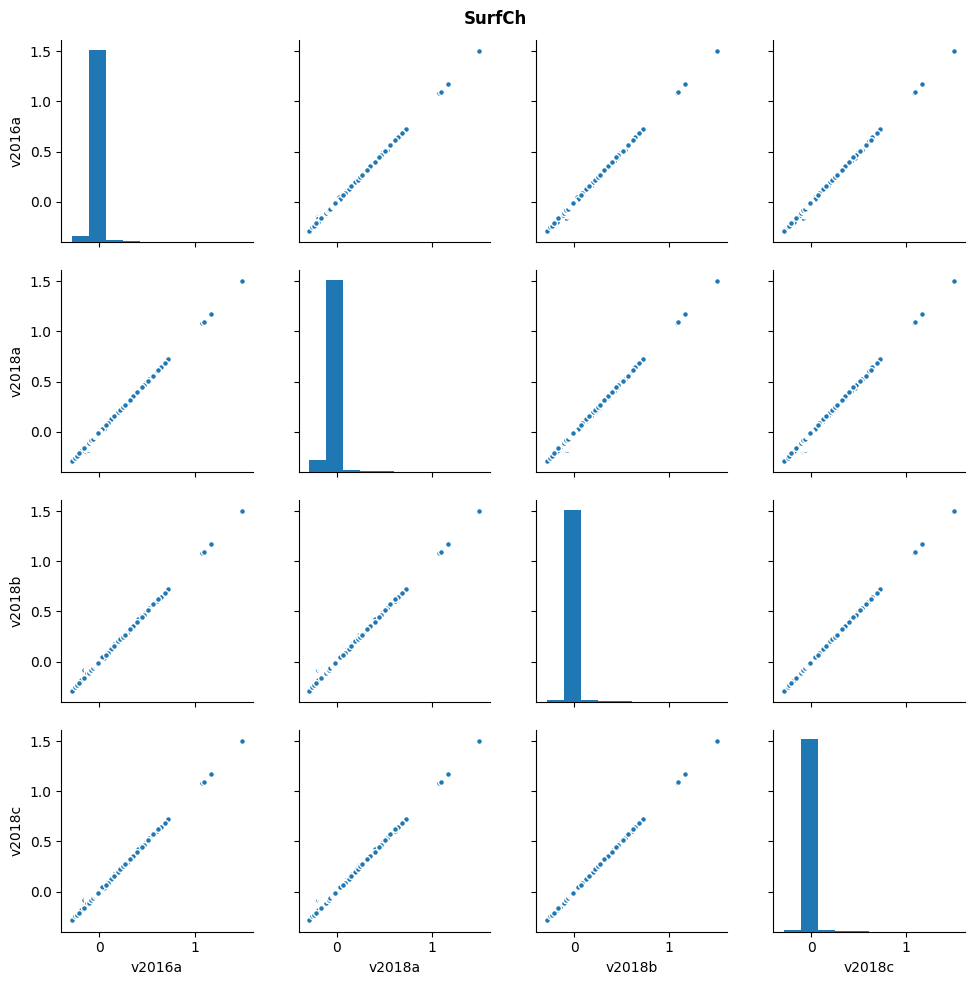

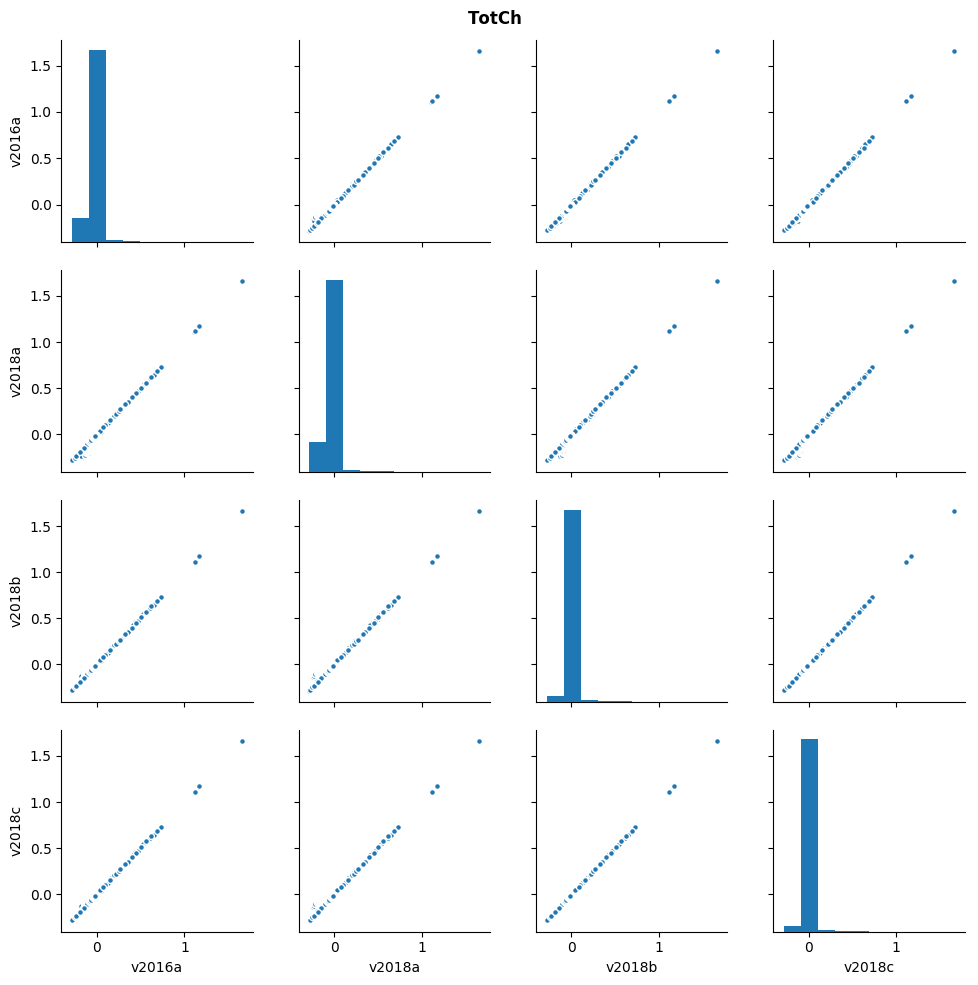

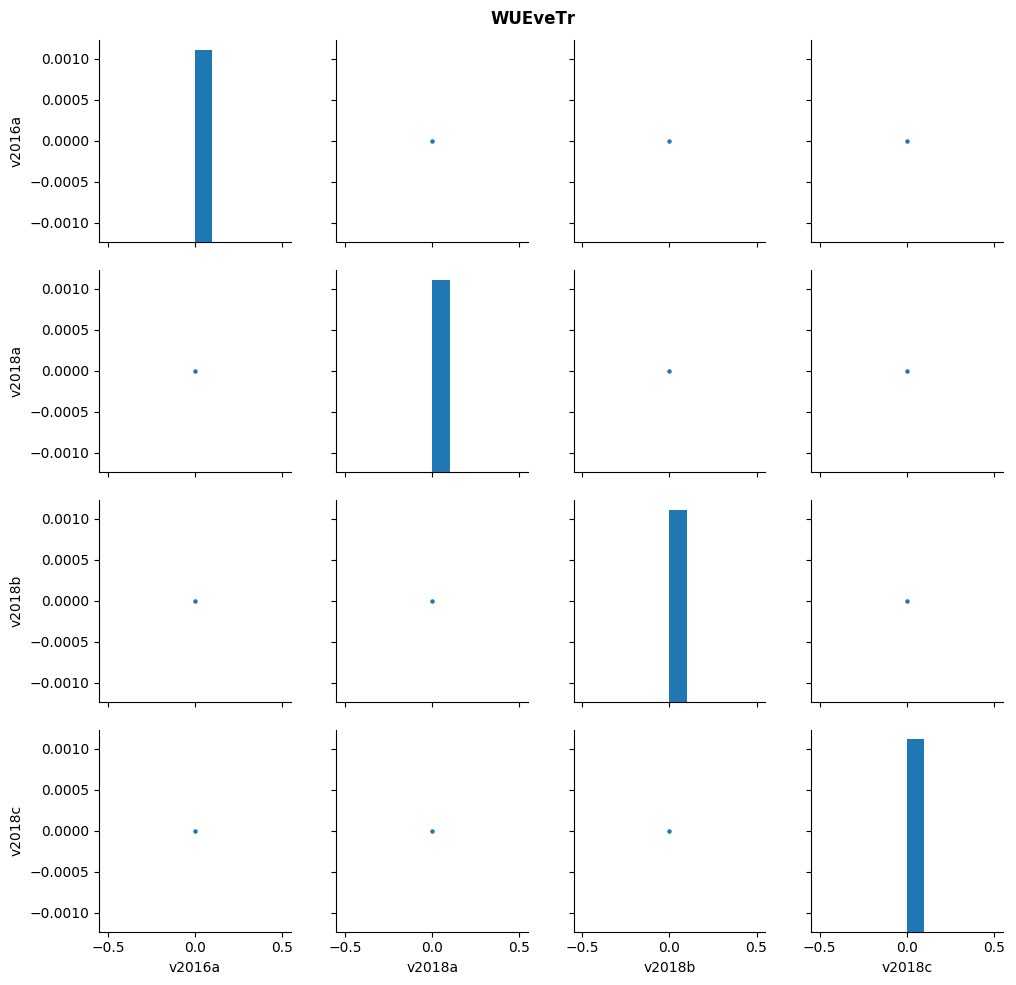

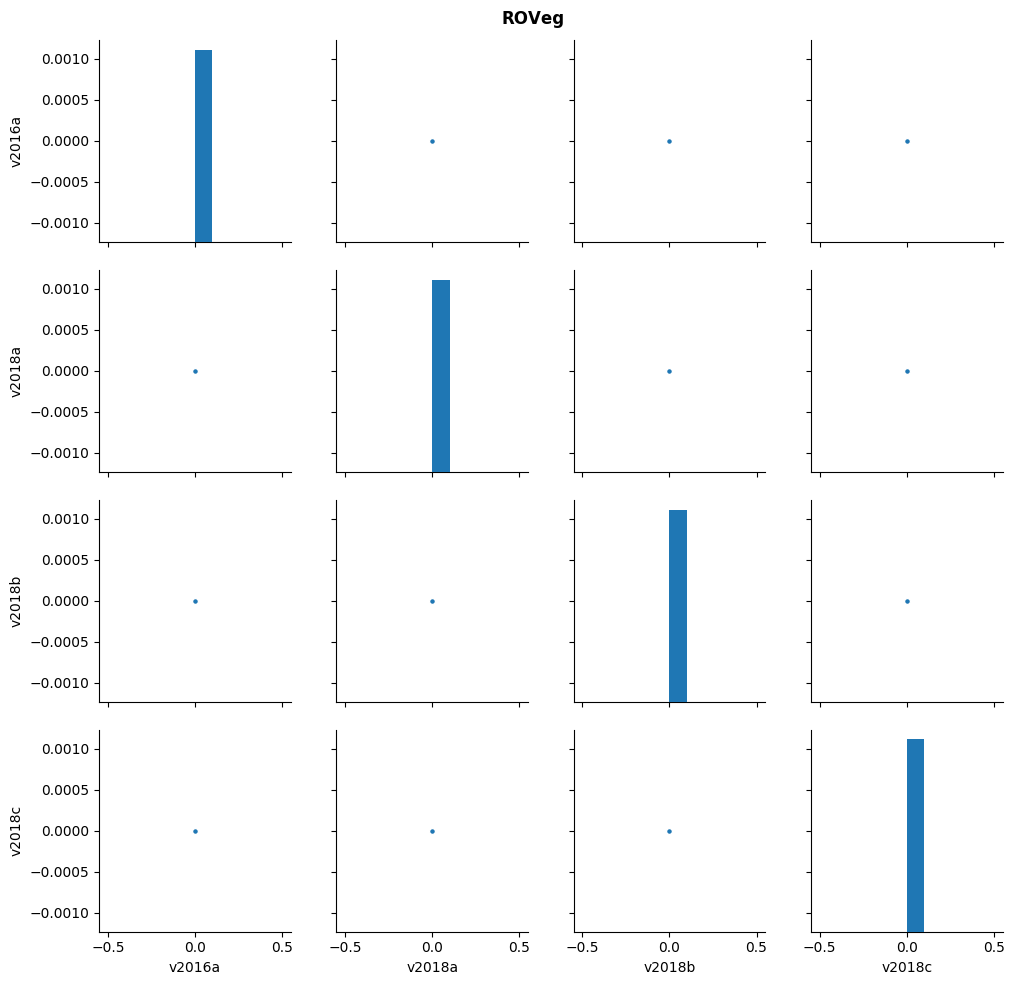

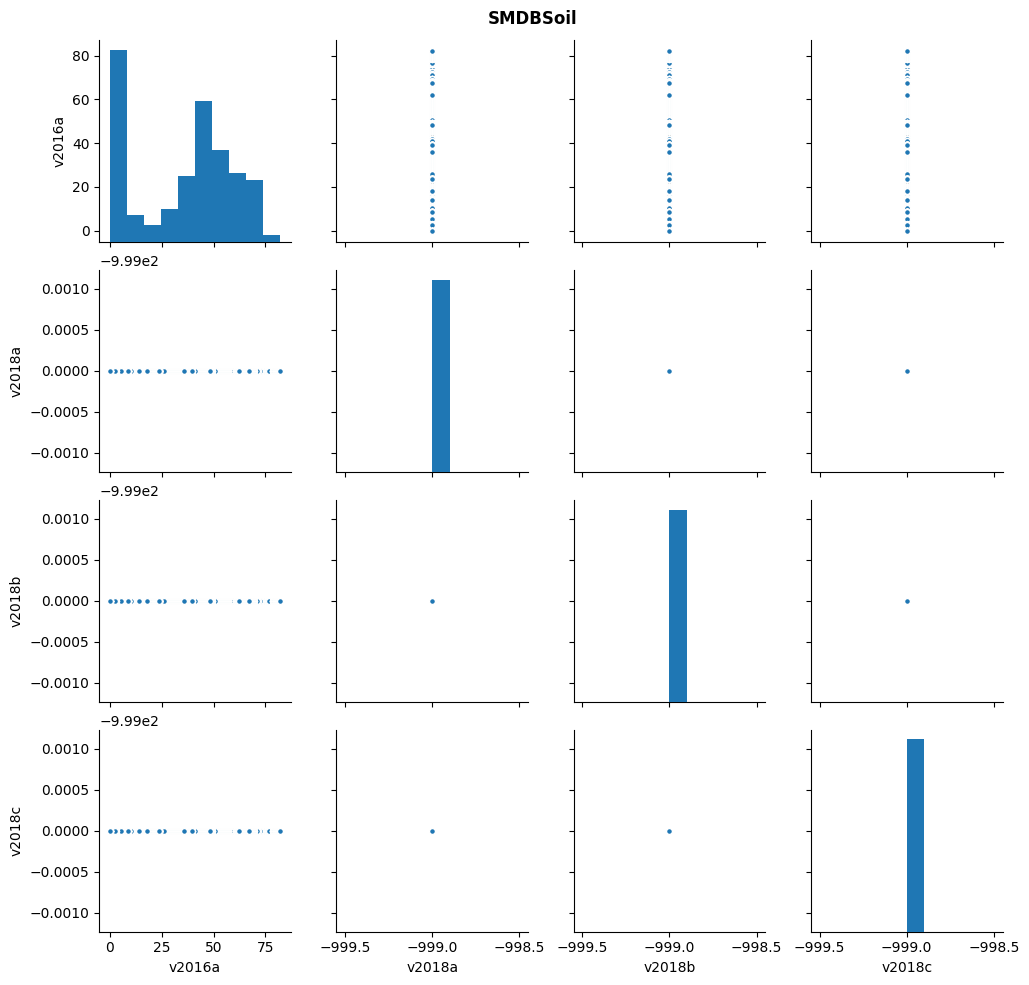

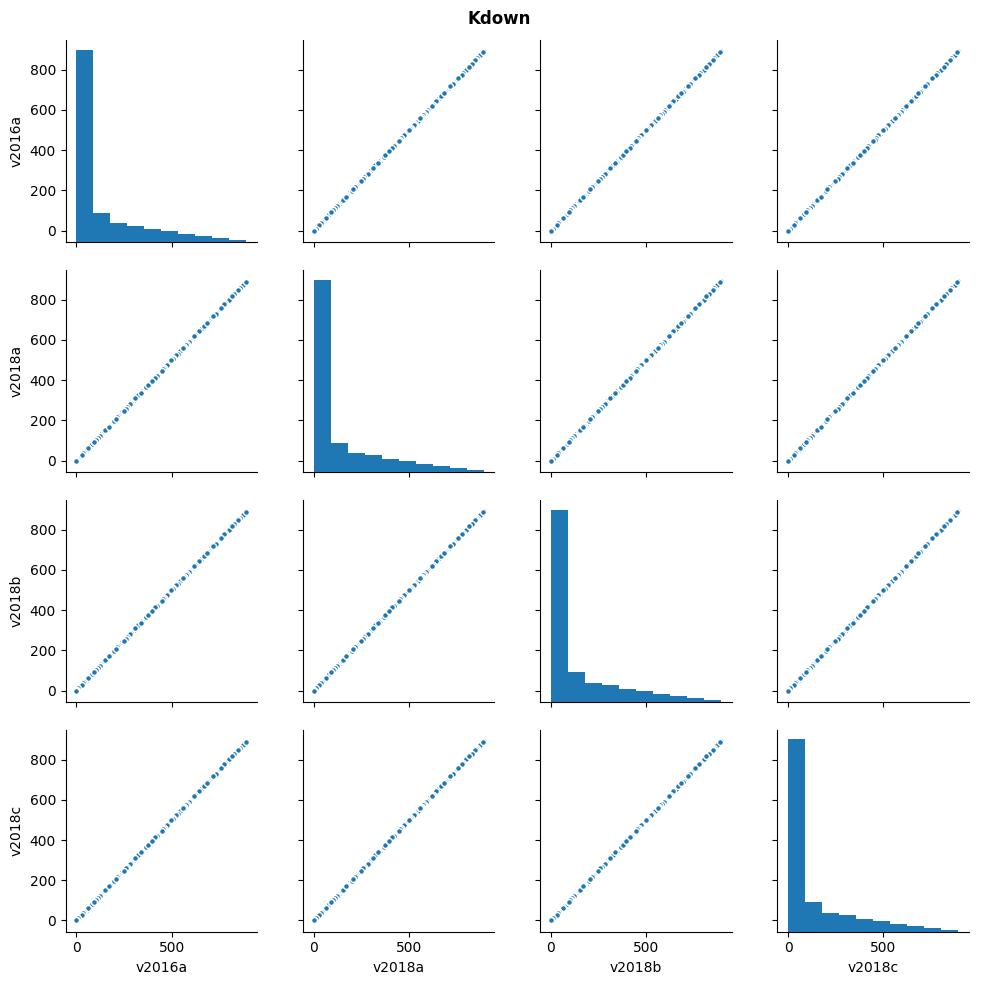

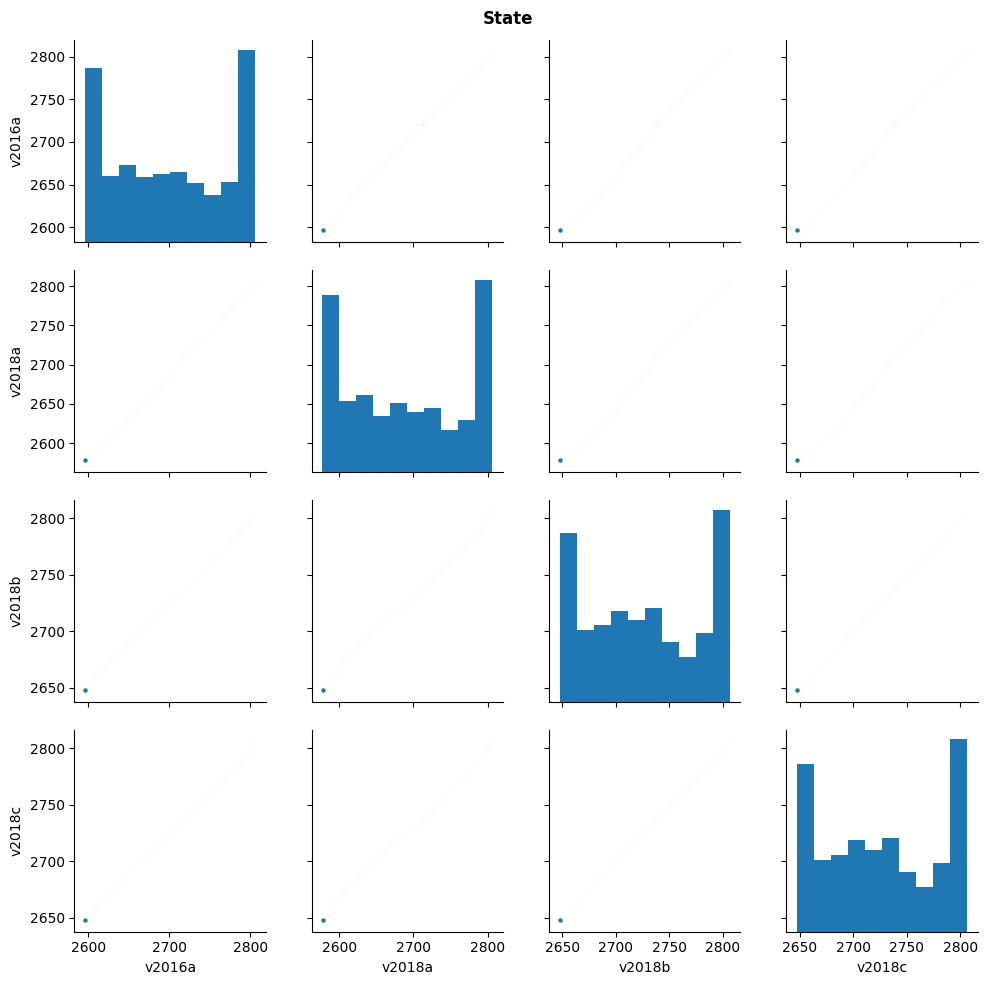

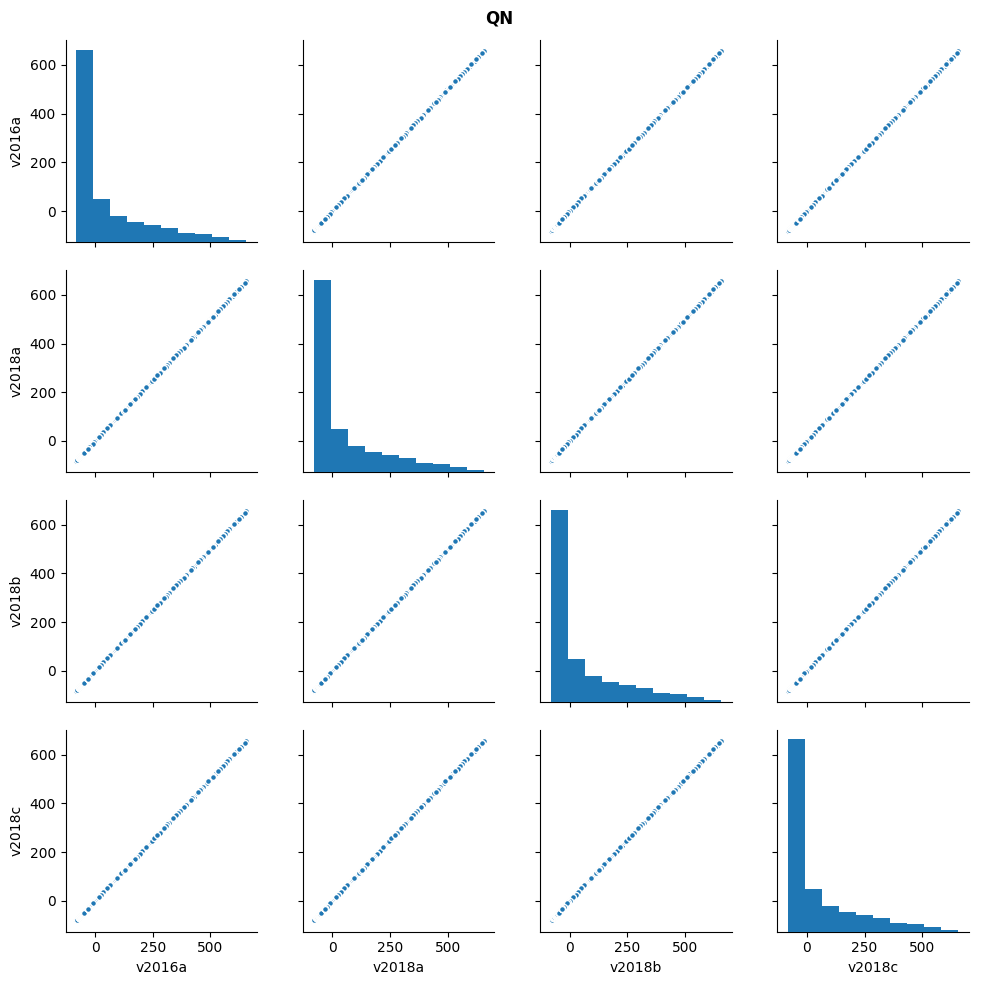

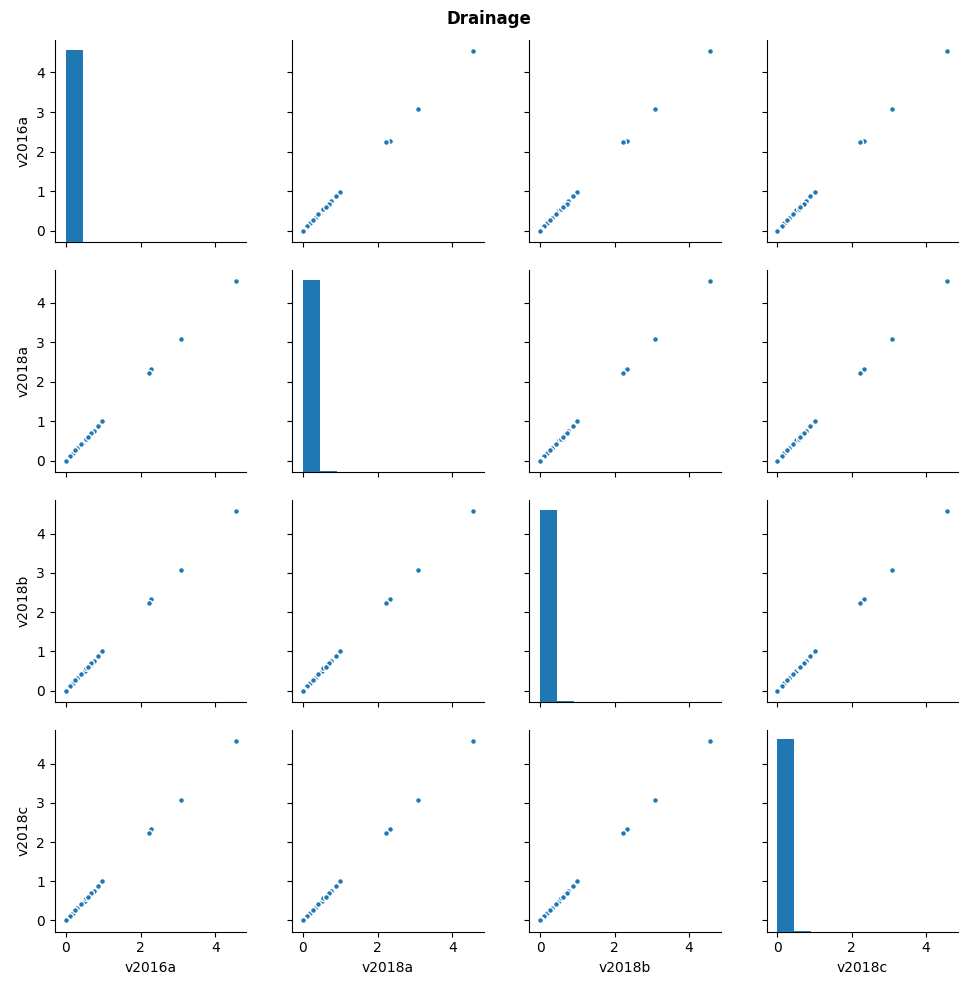

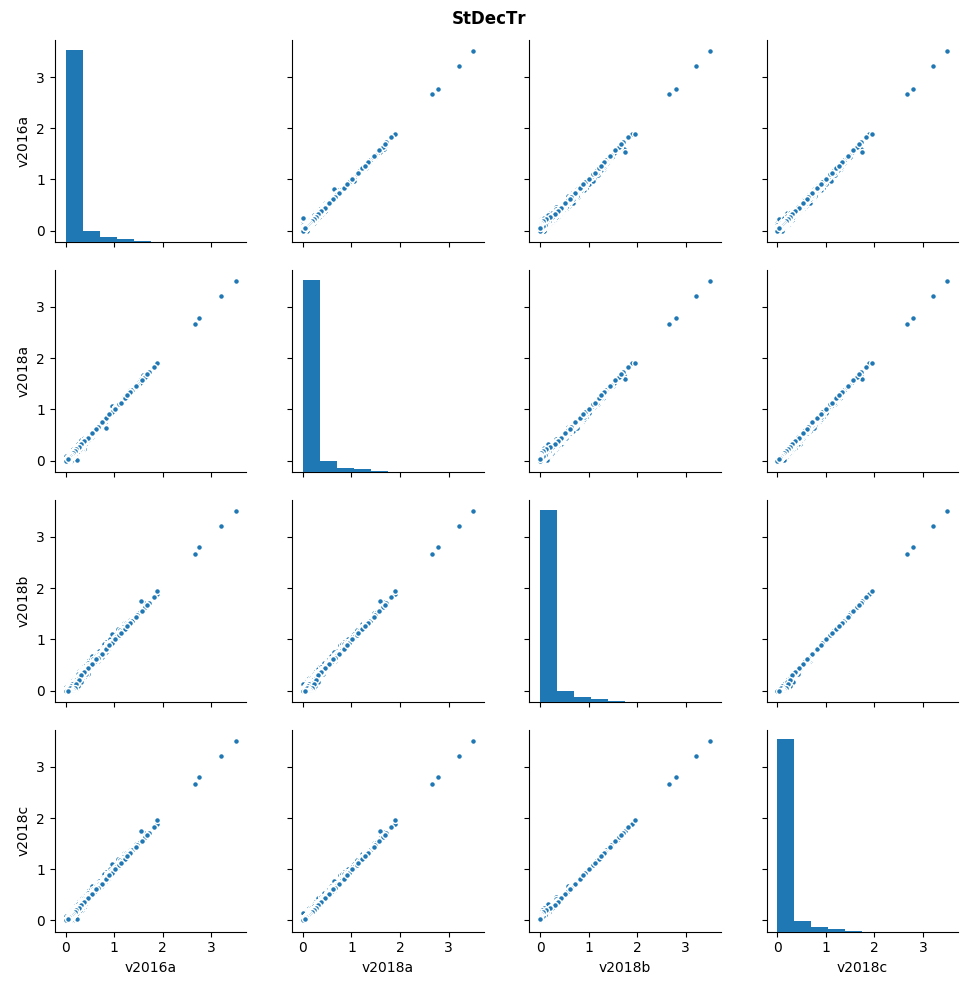

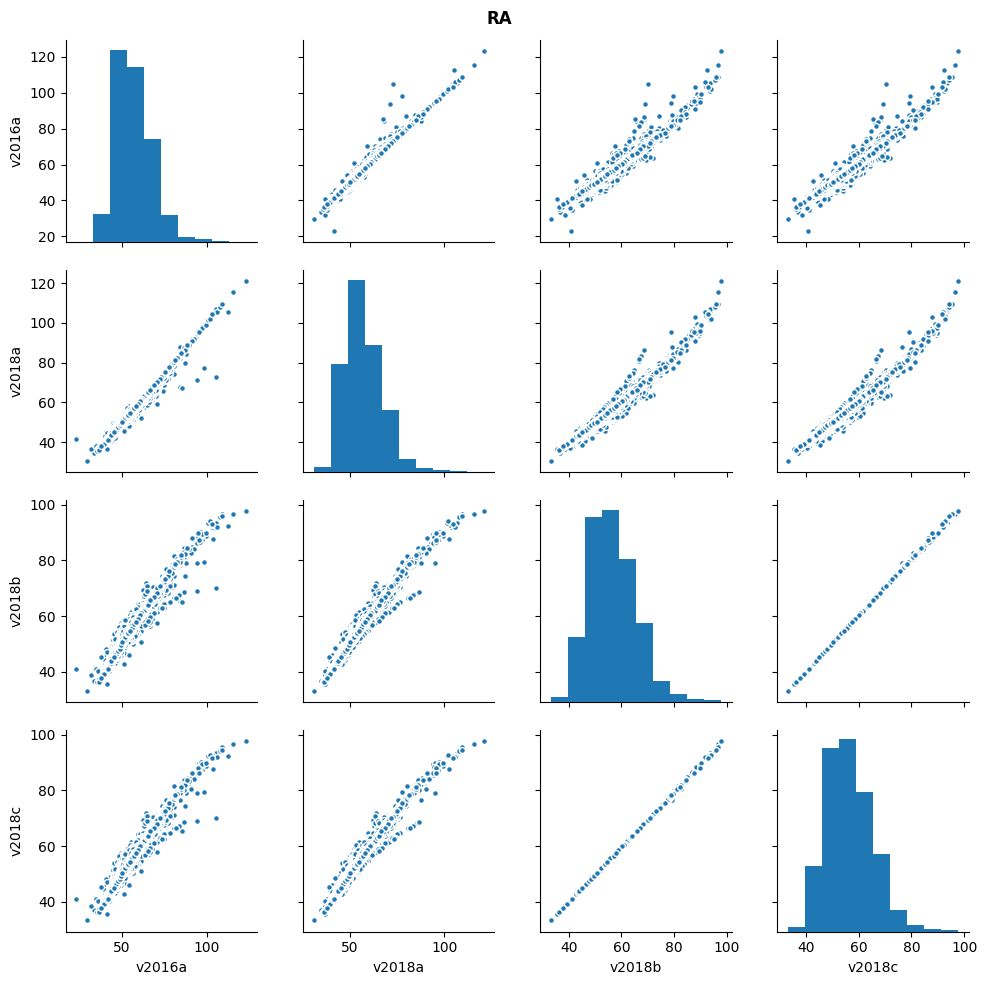

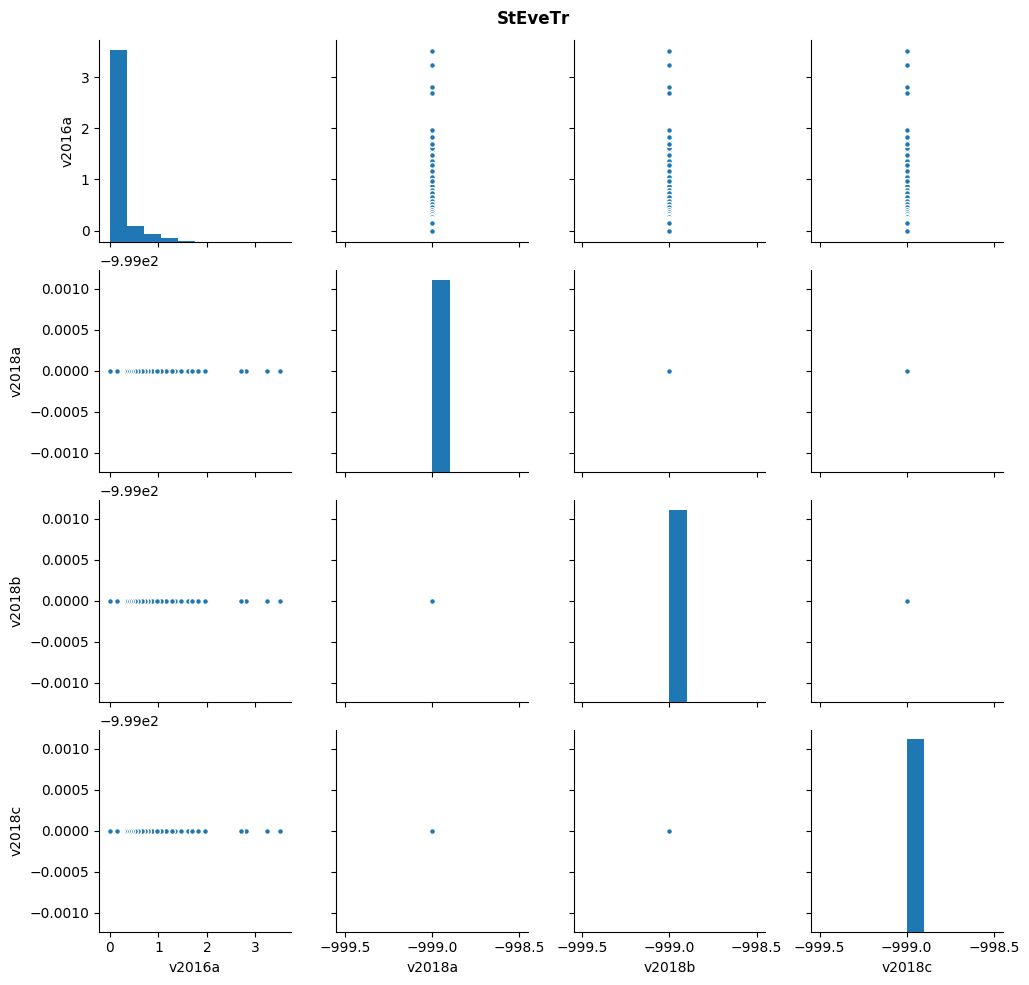

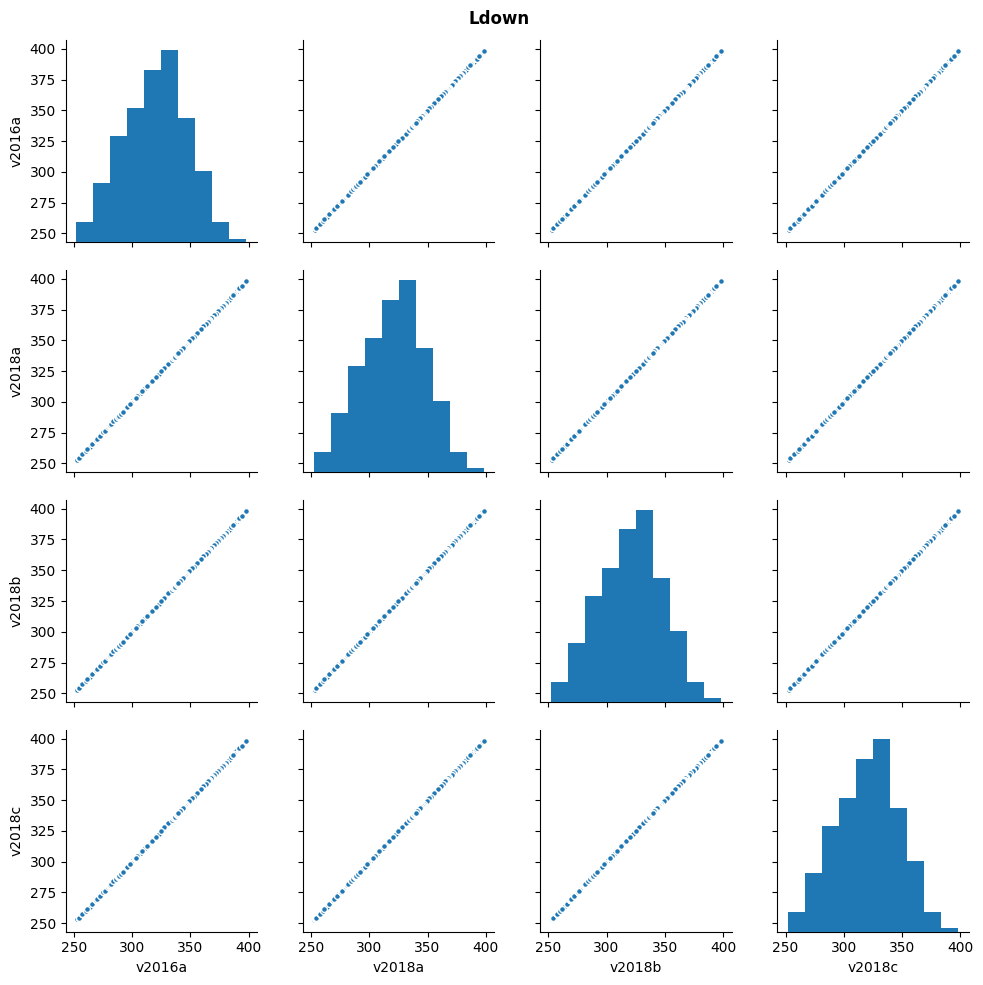

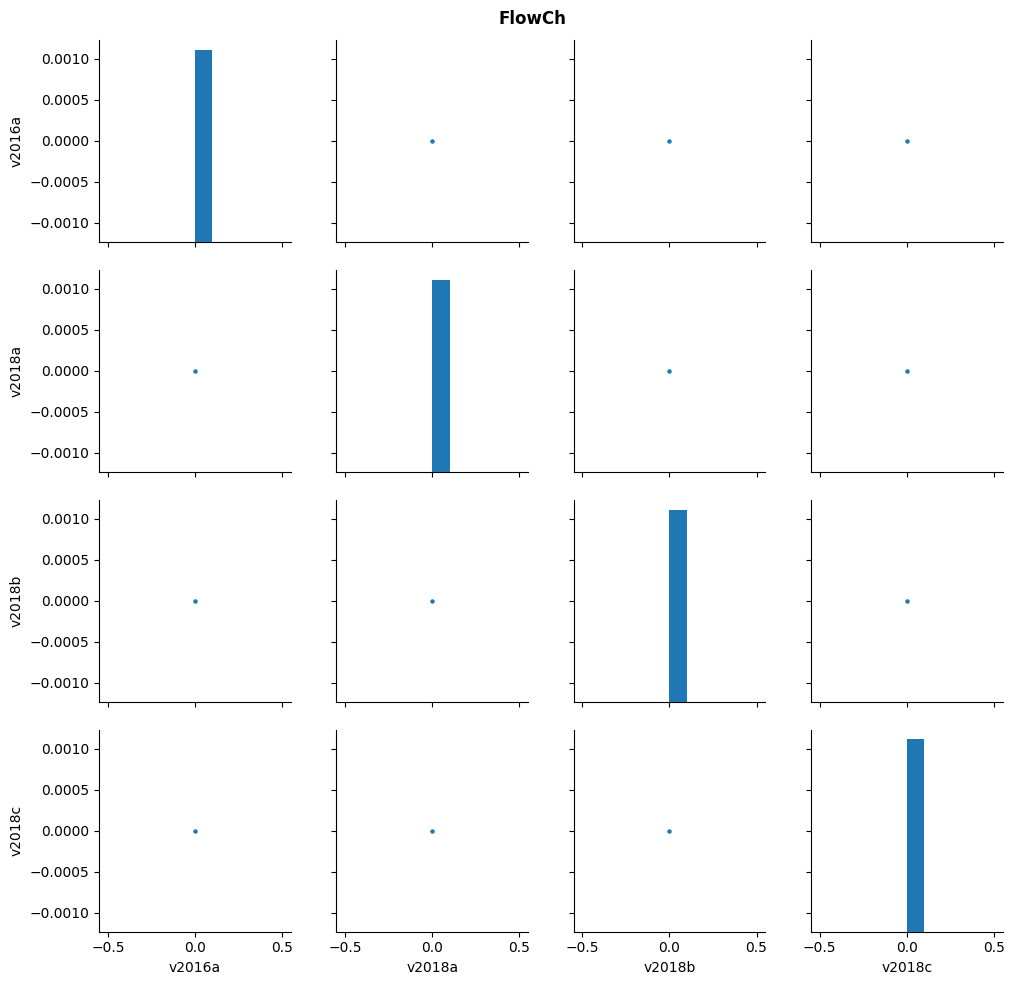

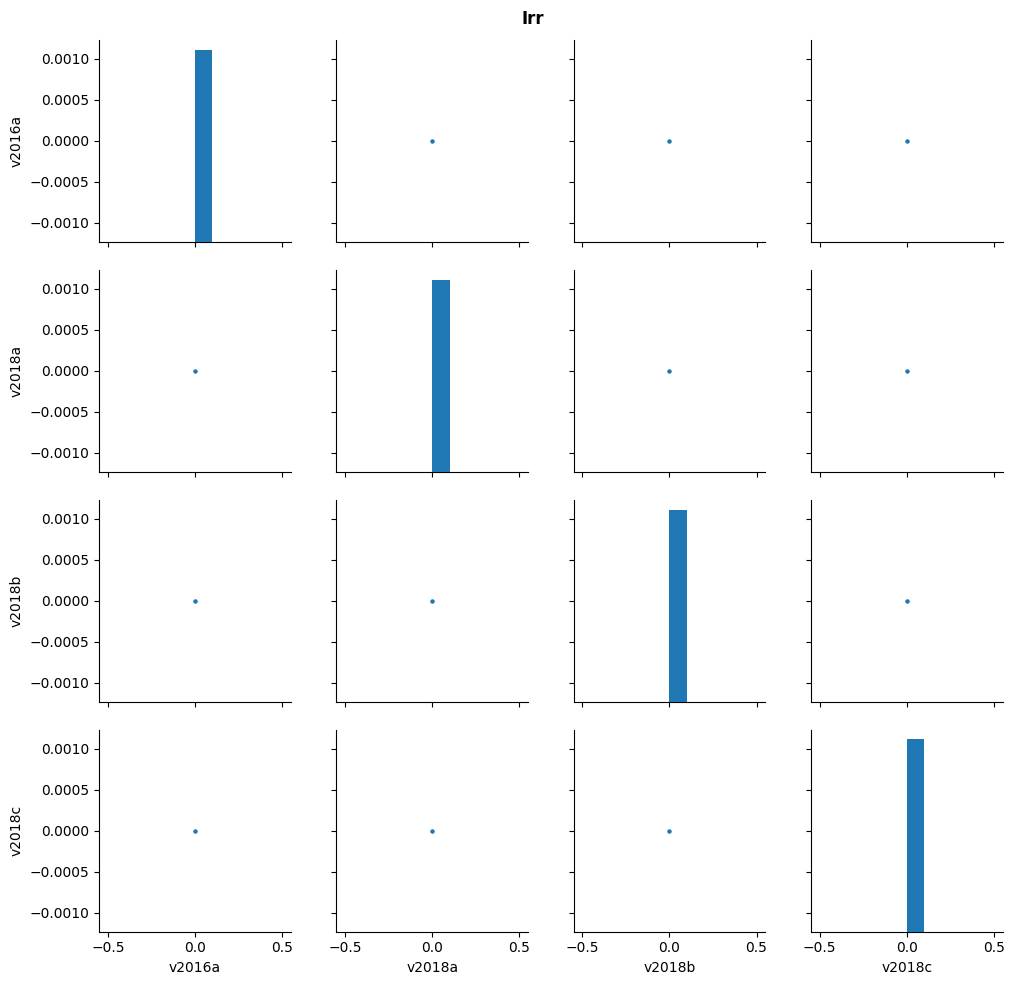

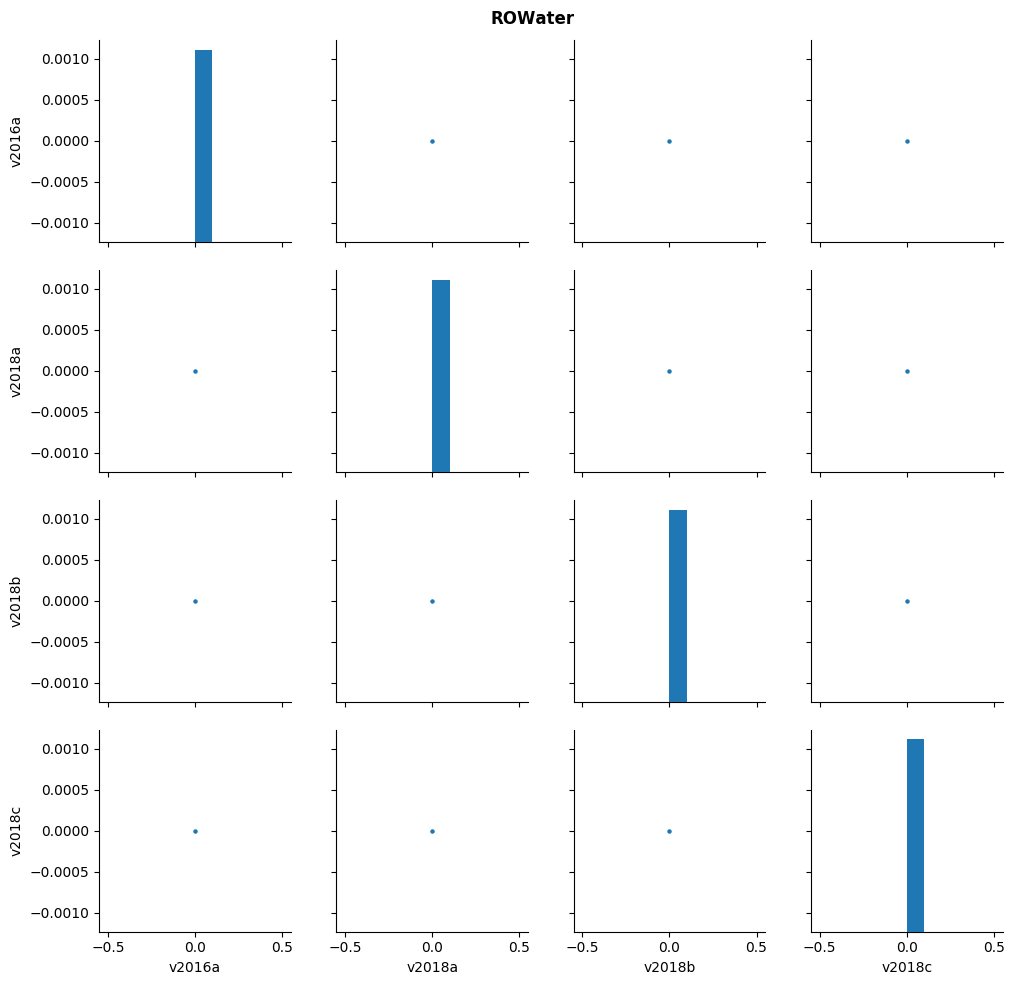

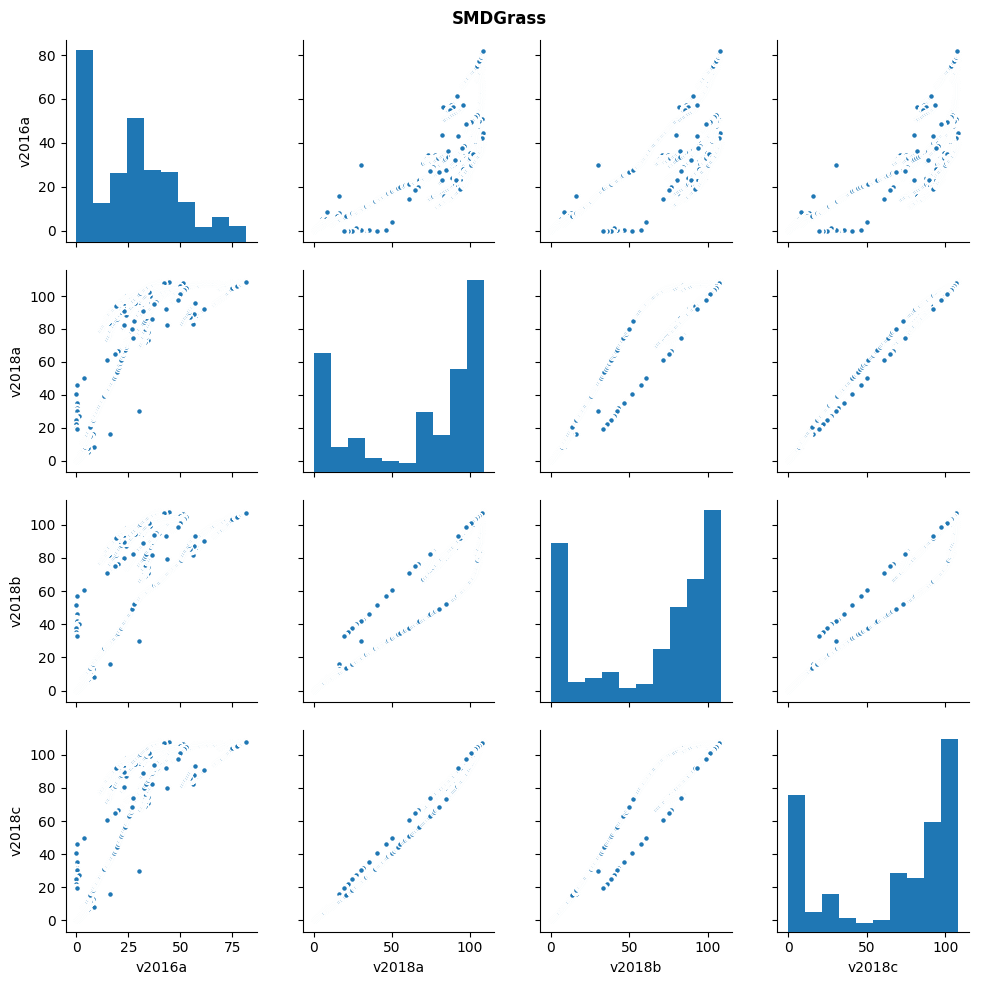

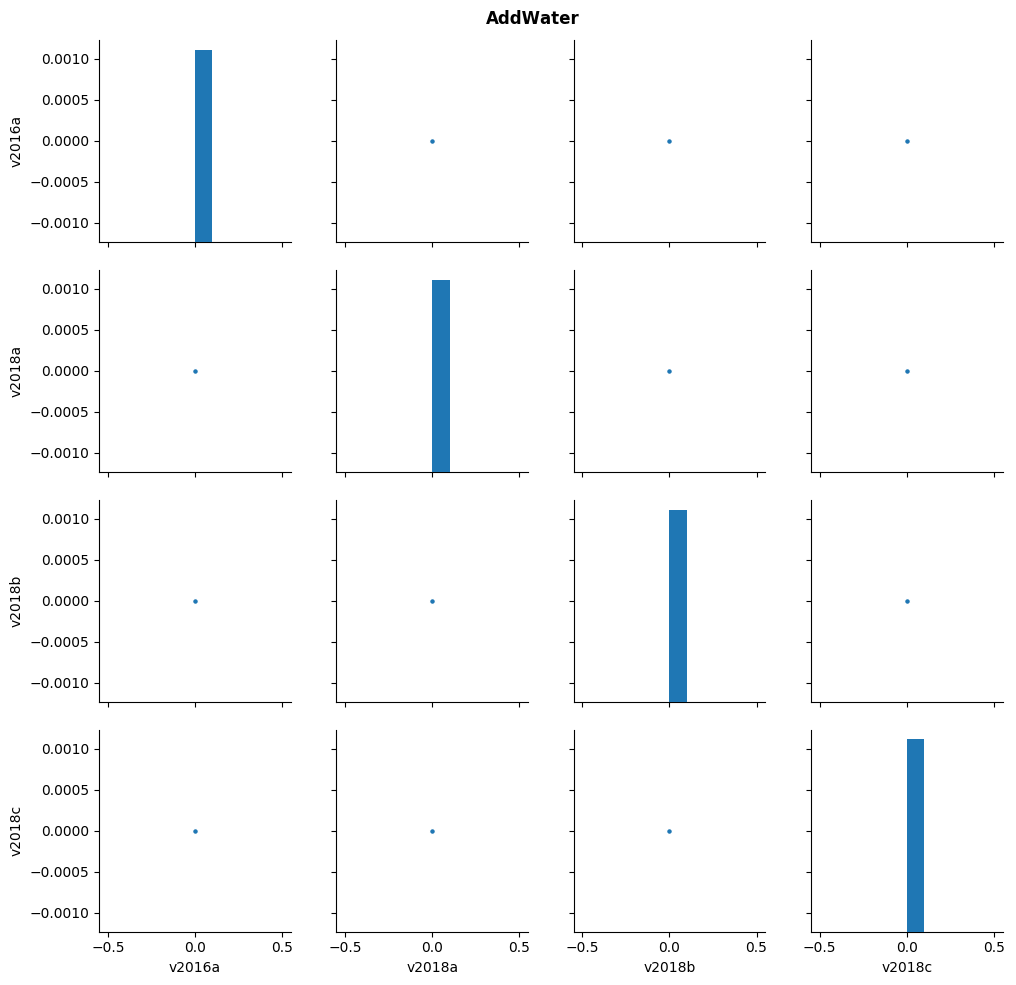

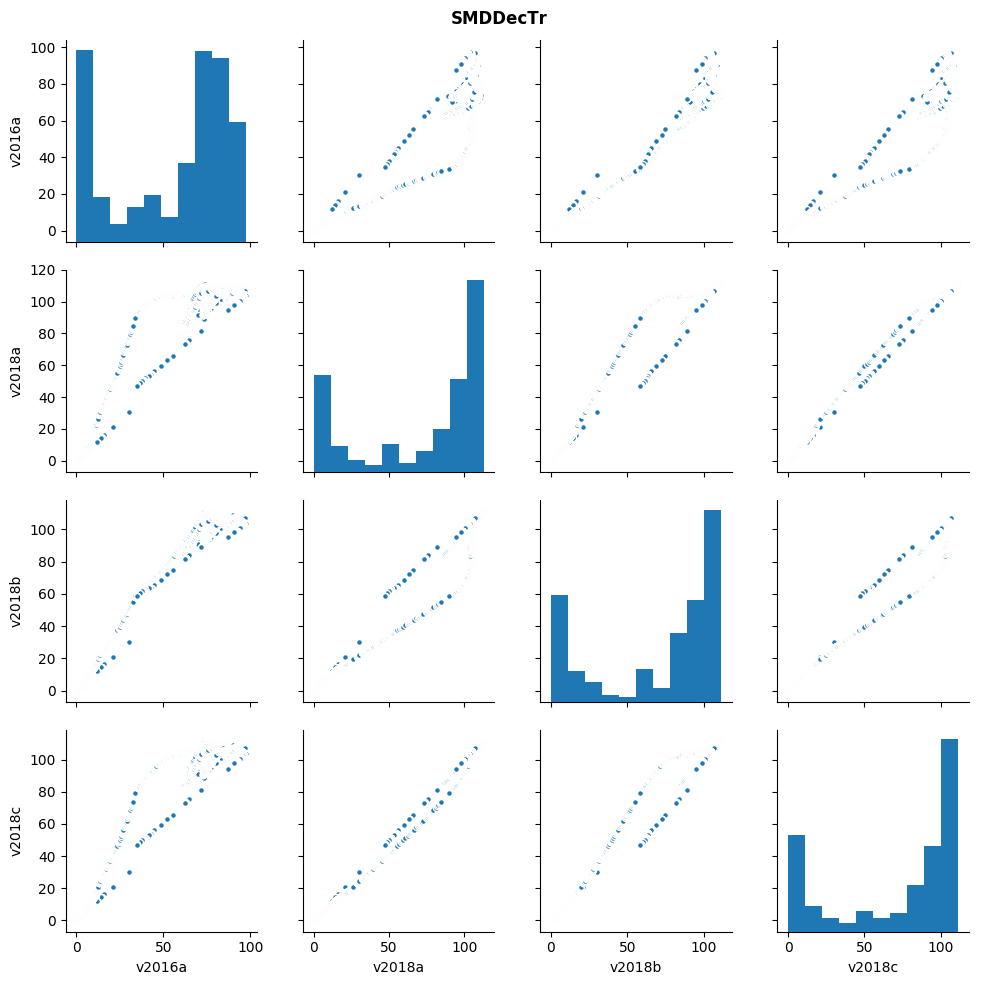

In [10]:
for var in df_bts_mod.columns.levels[0]:
    #     print(var)
    df_var = df_bts_input[var]\
        .apply(pd.to_numeric, errors='coerce')\
        .dropna(axis=1, how='all')\
        .dropna(axis=0, how='any')\
        .filter(like='v2')
    g_var = sns.pairplot(
        df_var,
        #         diag_kind='kde',
        kind='scatter',
        plot_kws=dict(
            s=18,
            linewidth=1,
        ),
    )
    g_var.fig.subplots_adjust(top=0.95)
    g_var.fig.suptitle(var, weight='bold')
